# Problem Statement
The objective is to build a model that could predict a fair listing price for a property based on its attributes.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import statistics
import scipy.stats as stats

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pylab
import warnings
warnings.filterwarnings('ignore')

# Uploading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb_Data.csv')

# Data Overview

In [4]:
def data_overview(df):
    print("a glimpse of the data")
    print("----------------------------------------------------------------------------")
    display(df.head())
    print("\n")

    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")

    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")

    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")

    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")

    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of dupliacte rows: {df.duplicated().sum()}")
    print("\n")

    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [5]:
data_overview(airbnb)

a glimpse of the data
----------------------------------------------------------------------------


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0




shape of the dataset
----------------------------------------------------------------------------


(74111, 29)



statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01




information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  o

None



missing values
----------------------------------------------------------------------------


,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0




checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


value counts for property_type
----------------------------------------------------------------------------
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet           

### Key Observations
1. There are 74111 rows and 29 columns in the dataset of which some columns are not relevant for our model, we will remove them during pre-processing.
2. 'aminities' columns has dictionaries passed in it for amminities in each column, we will replace this dictionary with a count of amminities in each property.
3. data type for 10 columns is numeric, 18 columns object type and 1 column is boolean type, column 'host_response_rate' has data in percentage terms. However, due to '%' sign the datatype is object while the data is continuous so we will remove the '%' and convert it into numeric data as it makes more sense that ways.  
4. There are significant number of missing values in the data frame which we will have to impute.
5. There are no duplicates in the data.
6. Columns 'property_type' and 'cancellation_propert are relavant for us, however, value count for these columns shows that there are groups within these features whose value count is very low. Due to these groups our model might get unstable or there might be an issue of overfitting, to overcome this issue we will merge some groups for these features.

# Data Pre-processing
### Removing irrelevant columns

In [6]:
airbnb_v1 = airbnb.drop(['id', 'description','first_review', 'host_has_profile_pic','host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
                         'thumbnail_url', 'zipcode'], axis = 1)
airbnb_v1.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,t,NaN,f,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,f,100%,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,100%,t,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,t,NaN,f,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,100%,t,4,40.0,0.0,1.0


### Converting data type for 'host_response_rate' to numeric

In [7]:
airbnb_v1['host_response_rate']= airbnb_v1['host_response_rate'].str.rstrip('%').astype('float')/100
airbnb_v1['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74111 entries, 0 to 74110
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
55812 non-null  float64
dtypes: float64(1)
memory usage: 579.1 KB


# Imputing missing values

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
SI = SimpleImputer(strategy = 'median')
SI.fit(airbnb_v1.select_dtypes(include = 'number'))
imputer = SI.transform(airbnb_v1.select_dtypes(include = 'number'))
airbnb_num = pd.DataFrame(imputer, columns = airbnb_v1.select_dtypes(include = 'number').columns)
airbnb_num.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0


In [10]:
airbnb_num.isnull().sum()

,0
log_price,0
accommodates,0
bathrooms,0
host_response_rate,0
number_of_reviews,0
review_scores_rating,0
bedrooms,0
beds,0


In [11]:
SI = SimpleImputer(strategy = 'most_frequent')
SI.fit(airbnb_v1.select_dtypes(include = 'object'))
imputer = SI.transform(airbnb_v1.select_dtypes(include = 'object'))
airbnb_obj = pd.DataFrame(imputer, columns = airbnb_v1.select_dtypes(include = 'object').columns)
airbnb_obj.head()

,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,t,f
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,f,t
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,t,t
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,t,f
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,t,t


In [12]:
airbnb_obj.isnull().sum()

,0
property_type,0
room_type,0
amenities,0
bed_type,0
cancellation_policy,0
city,0
host_identity_verified,0
instant_bookable,0


In [13]:
airbnb_v2 = pd.concat([airbnb_num, airbnb_obj], axis = 1)
airbnb_v2['cleaning_fee'] = airbnb_v1['cleaning_fee']
airbnb_v2.isnull().sum()

,0
log_price,0
accommodates,0
bathrooms,0
host_response_rate,0
number_of_reviews,0
review_scores_rating,0
bedrooms,0
beds,0
property_type,0
room_type,0


In [14]:
airbnb_v2.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable,cleaning_fee
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,t,f,True
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,f,t,True
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,t,t,True
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,t,f,True
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,t,t,True


### count of aminities

In [15]:
aminities_count = []
for i in airbnb_v2['amenities']:
  aminities_count.append(len(i))

airbnb_v2['amenities'] = aminities_count
airbnb_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   accommodates            74111 non-null  float64
 2   bathrooms               74111 non-null  float64
 3   host_response_rate      74111 non-null  float64
 4   number_of_reviews       74111 non-null  float64
 5   review_scores_rating    74111 non-null  float64
 6   bedrooms                74111 non-null  float64
 7   beds                    74111 non-null  float64
 8   property_type           74111 non-null  object 
 9   room_type               74111 non-null  object 
 10  amenities               74111 non-null  int64  
 11  bed_type                74111 non-null  object 
 12  cancellation_policy     74111 non-null  object 
 13  city                    74111 non-null  object 
 14  host_identity_verified  74111 non-null

### Merging groups

In [16]:

value_count = airbnb_v2['property_type'].value_counts()

In [17]:
other_values = value_count[value_count < 50].index
airbnb_v2['property_type'] = airbnb_v2['property_type'].replace(other_values, 'Other')

In [18]:
airbnb_v2['property_type'].value_counts()

,count
property_type,
Apartment,49003
House,16511
Condominium,2658
Townhouse,1692
Loft,1244
Other,715
Guesthouse,498
Bed & Breakfast,462
Bungalow,366


In [19]:
airbnb_v2['cancellation_policy'] = airbnb_v2['cancellation_policy'].replace(['super_strict_30', 'super_strict_60'], 'super_strict')
airbnb_v2['cancellation_policy'].value_counts()

,count
cancellation_policy,
strict,32374
flexible,22545
moderate,19063
super_strict,129


# Exploratory Data Analysis
### Univariate Analysis
#### For numeric columns

In [20]:
def univariateAnalysis_numeric(df,column):
    print(f'Skewness of {column}: ', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)

    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()

Skewness of log_price:  0.5146954132526429
Distribution of log_price
----------------------------------------------------------------------------


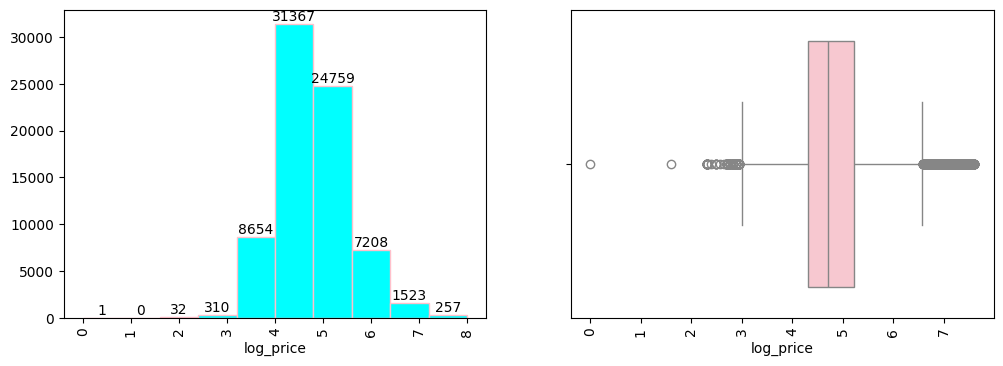

Skewness of accommodates:  2.231560573846241
Distribution of accommodates
----------------------------------------------------------------------------


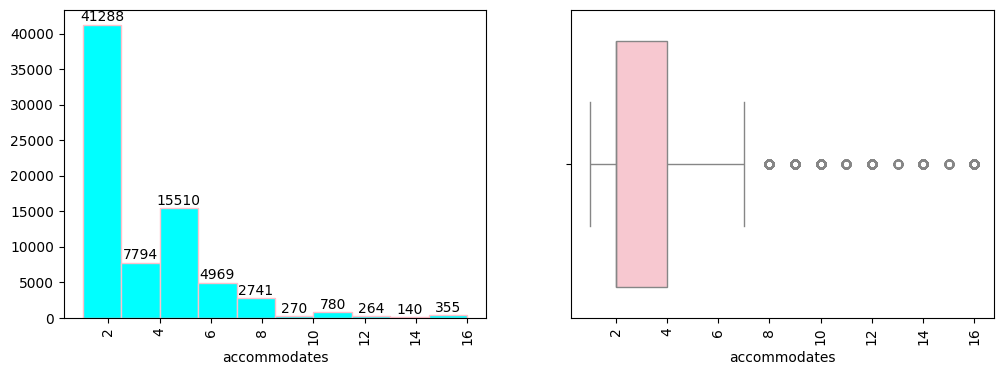

Skewness of bathrooms:  3.697097824420094
Distribution of bathrooms
----------------------------------------------------------------------------


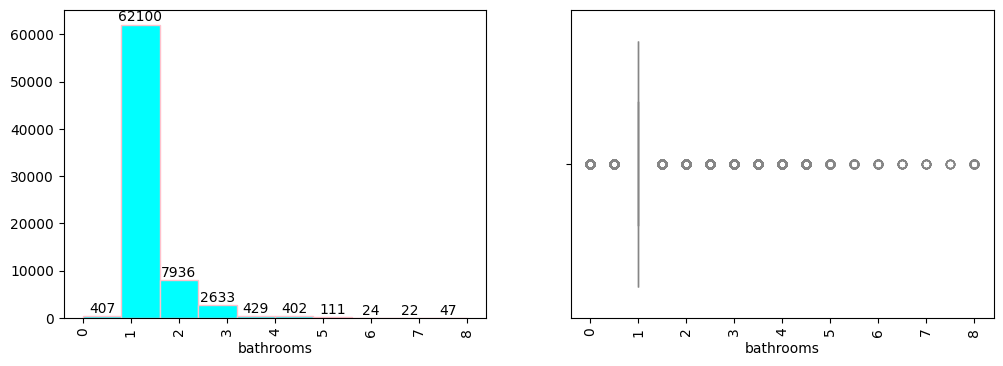

Skewness of host_response_rate:  -4.776563852731746
Distribution of host_response_rate
----------------------------------------------------------------------------


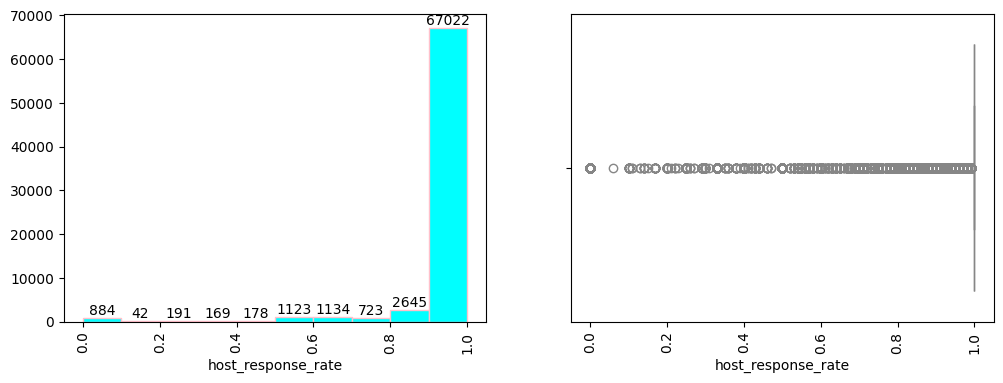

Skewness of number_of_reviews:  3.7028349778393865
Distribution of number_of_reviews
----------------------------------------------------------------------------


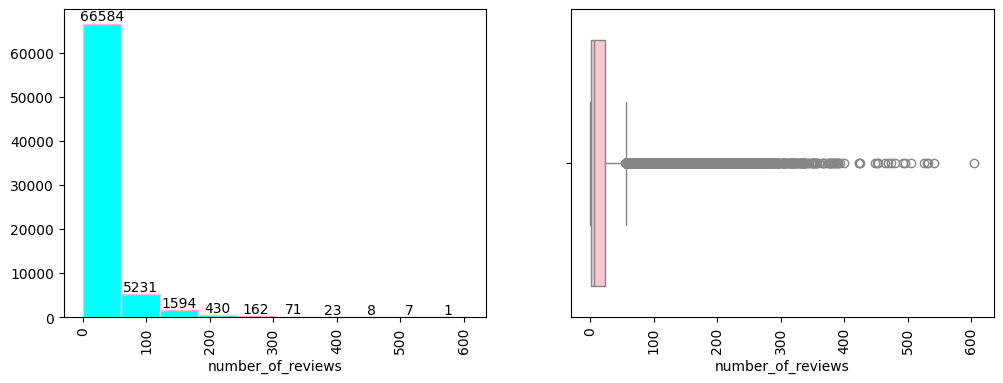

Skewness of review_scores_rating:  -3.948001568473135
Distribution of review_scores_rating
----------------------------------------------------------------------------


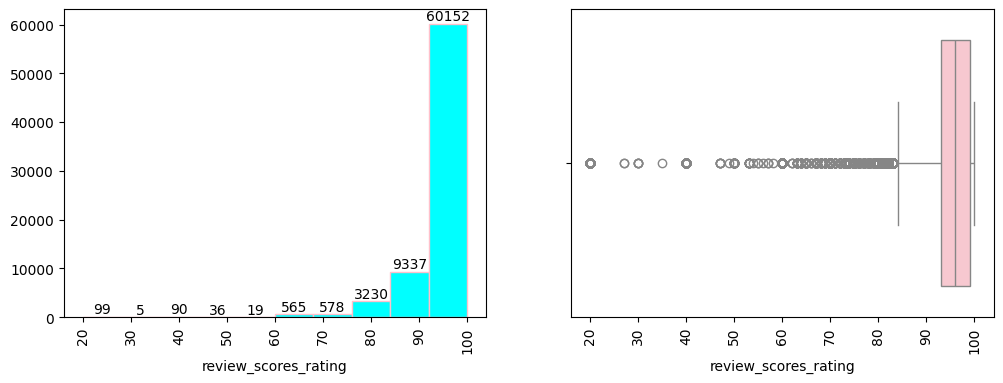

Skewness of bedrooms:  1.9918270658583581
Distribution of bedrooms
----------------------------------------------------------------------------


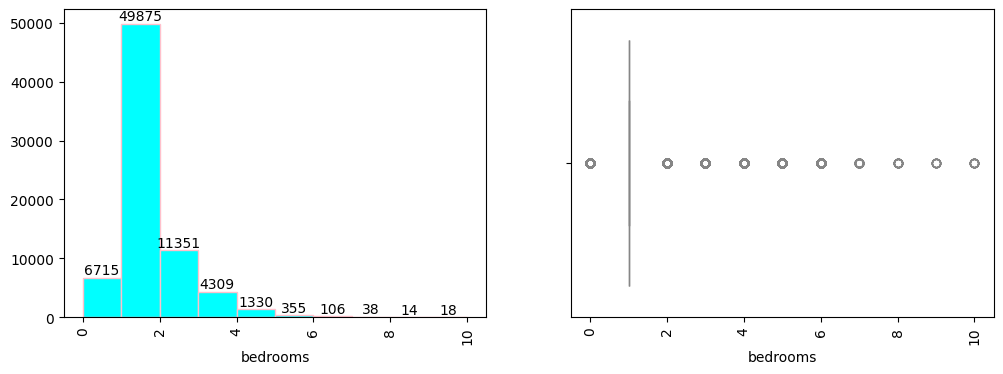

Skewness of beds:  3.360795937035629
Distribution of beds
----------------------------------------------------------------------------


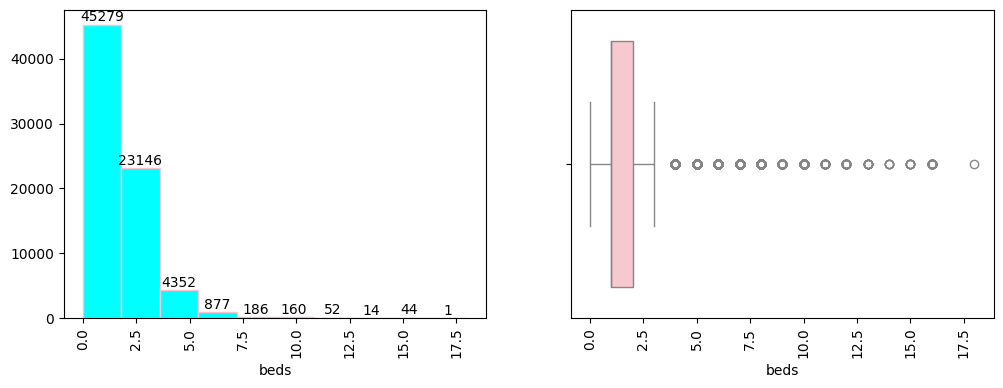

Skewness of amenities:  0.9512158797514776
Distribution of amenities
----------------------------------------------------------------------------


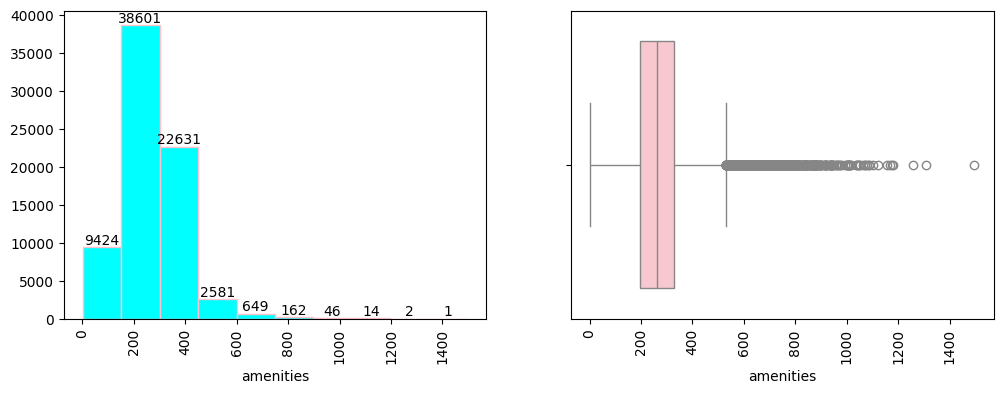

In [21]:
for column in airbnb_v2.select_dtypes(include = 'number').columns:
  univariateAnalysis_numeric(airbnb_v2, column)

#### Observations
1. There is skewness in all the numeric columns, log_price has lowest skewness of 0.51 and host_response_rate has highest skewness of -4.77.
2. There are significant number of outliers for all the columns.
3. We will not be treating the skewness and outliers in the data as we want our model to capture their effect.
#### for object columns

In [22]:
def univariateAnalysis_category(df, cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    plt.figure()
    plt.figure(figsize=(12, 8))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

Details of property_type
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

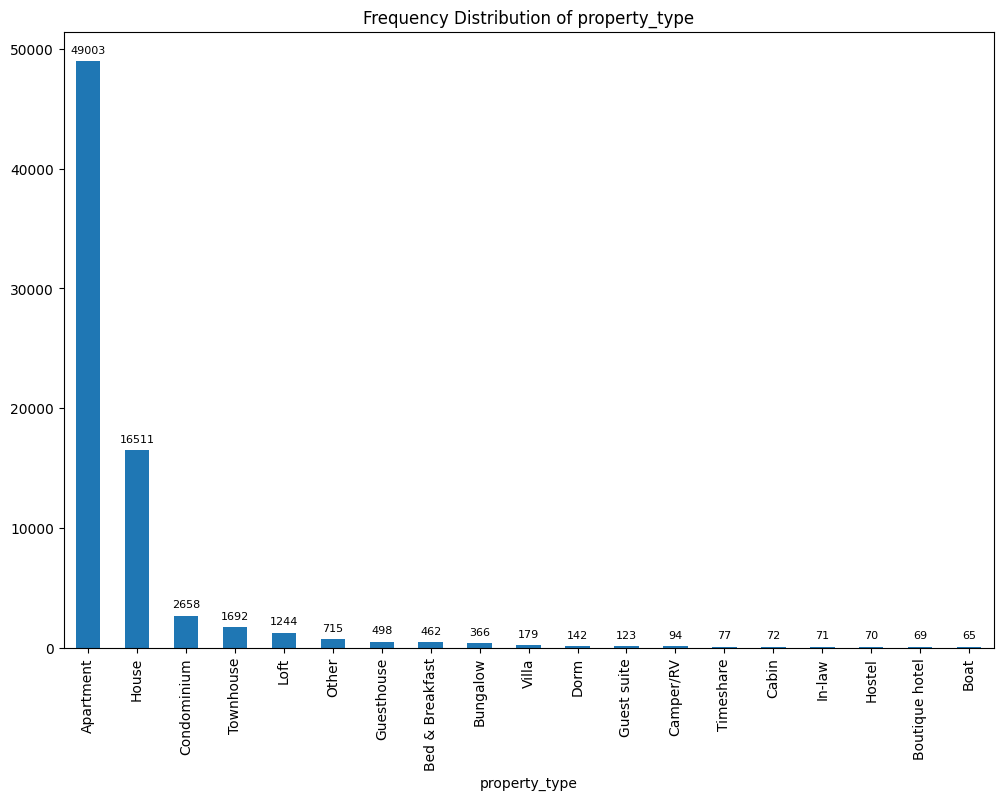

       
Details of room_type
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

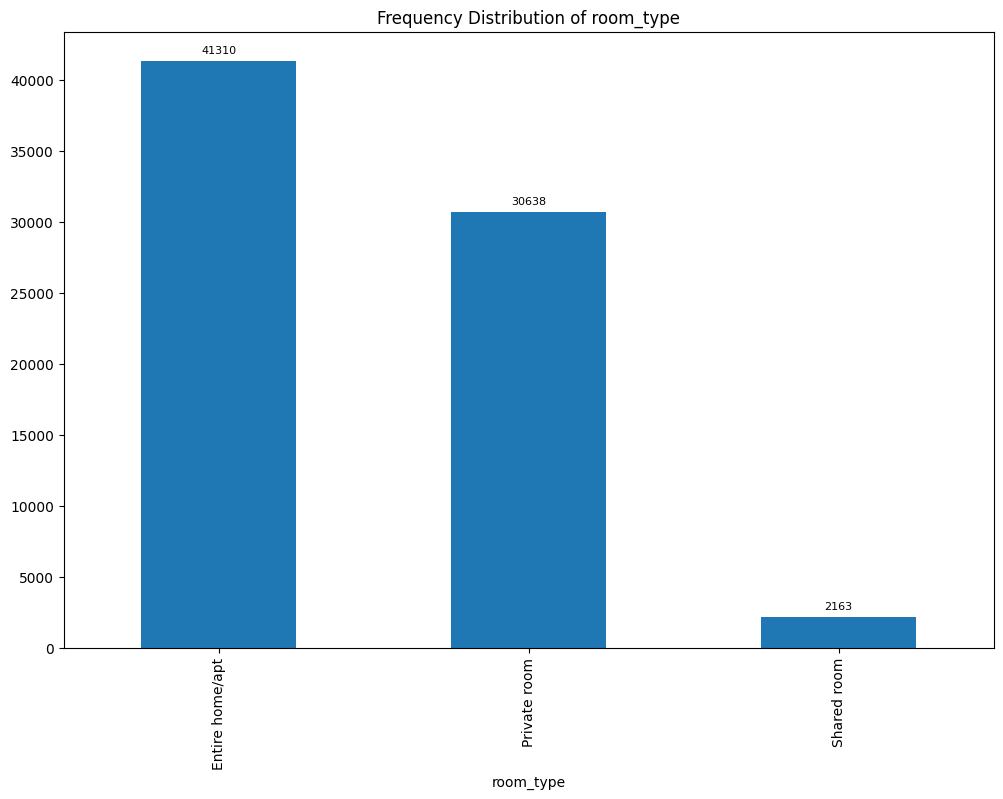

       
Details of bed_type
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

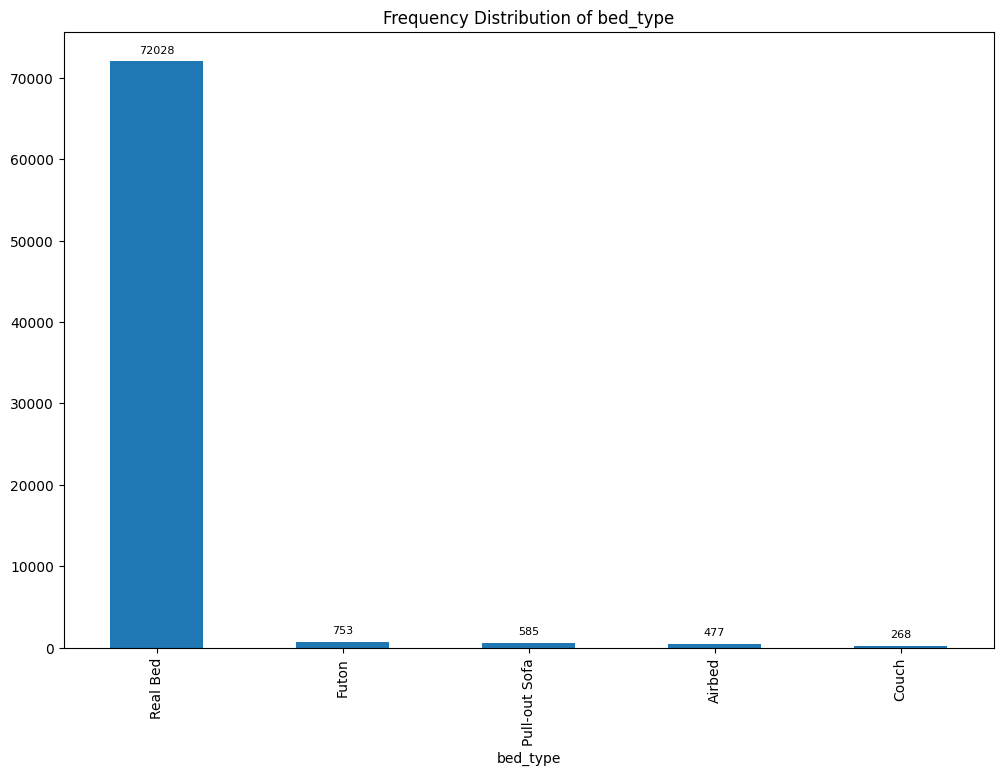

       
Details of cancellation_policy
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

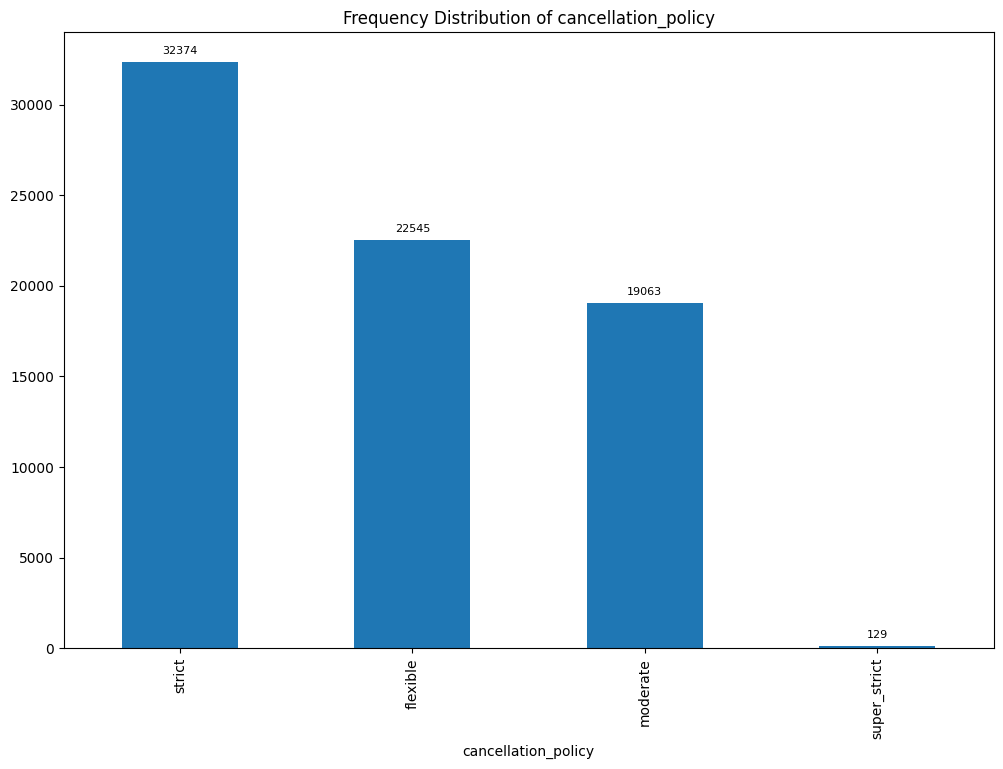

       
Details of city
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

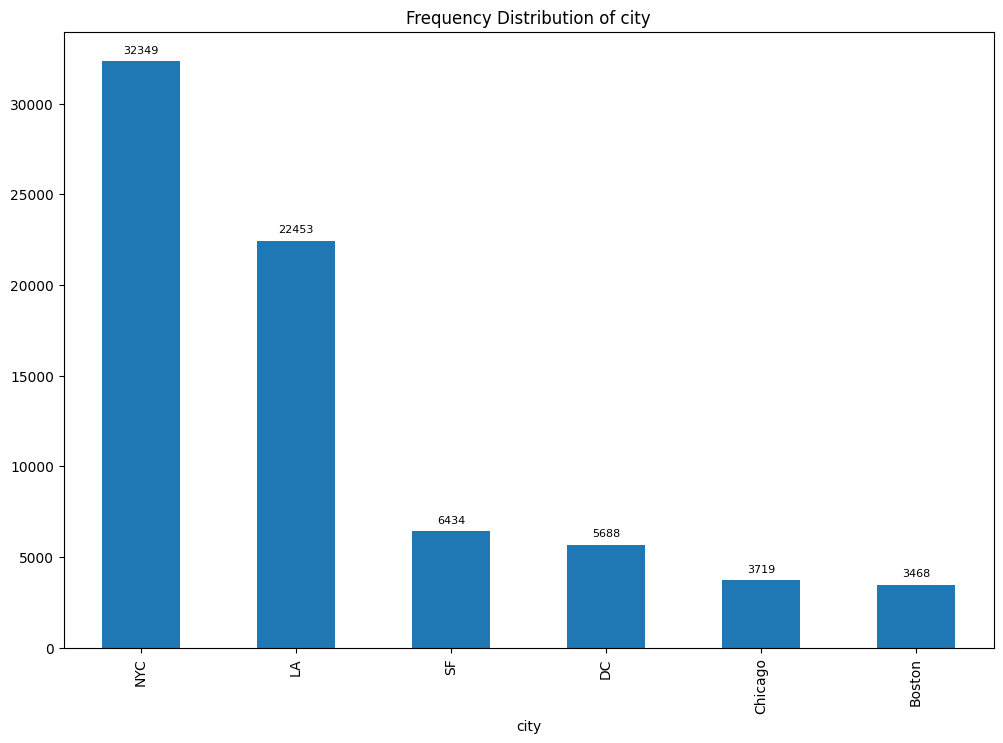

       
Details of host_identity_verified
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

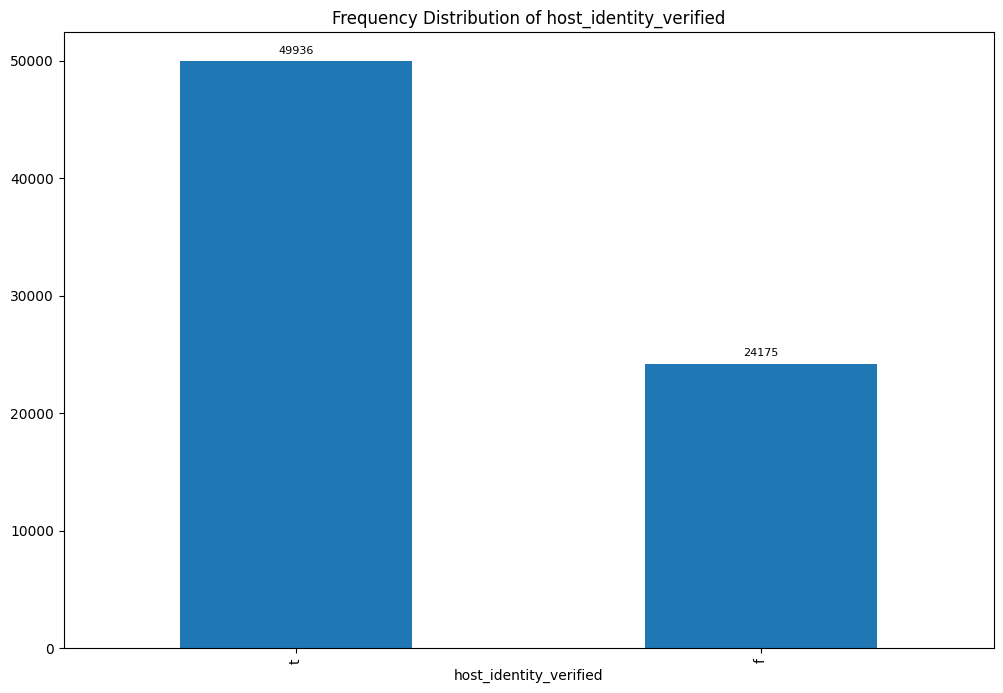

       
Details of instant_bookable
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

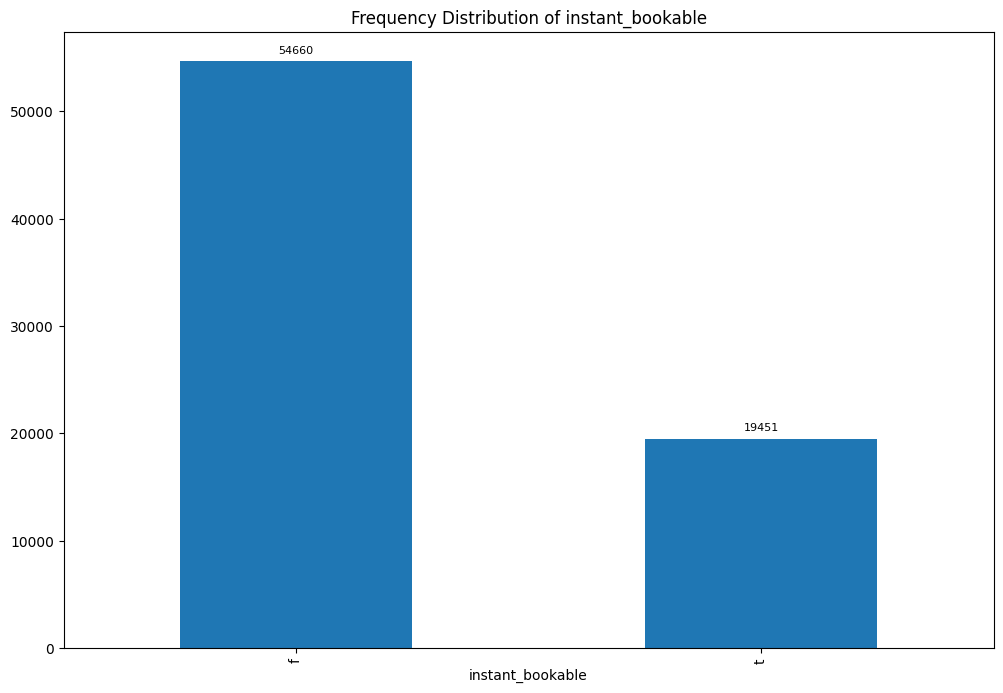

       
Details of cleaning_fee
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

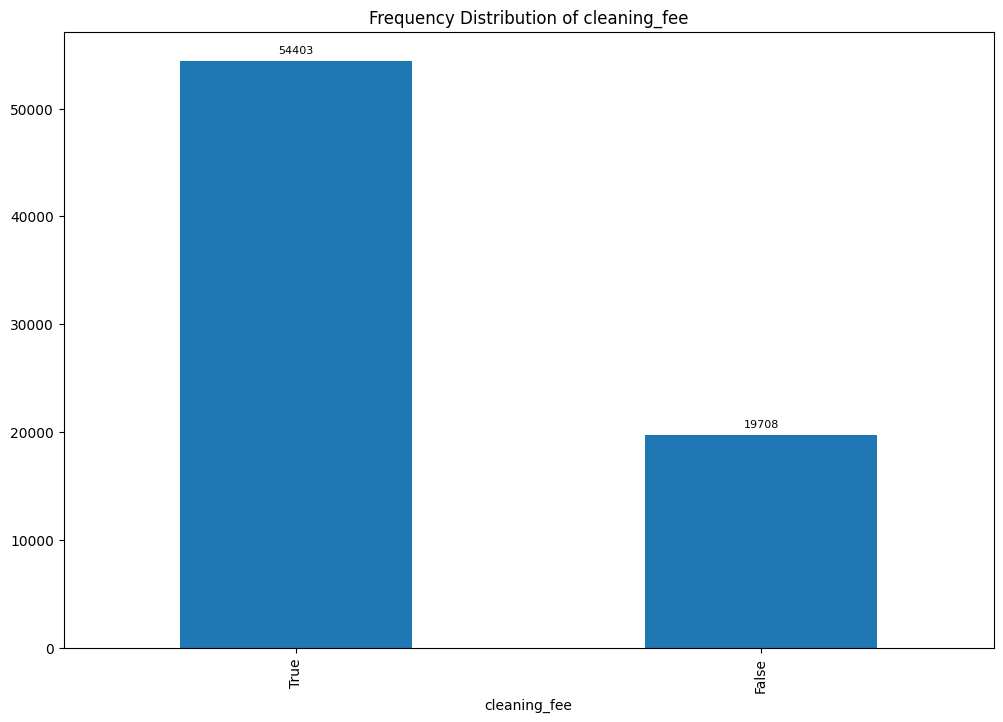

In [23]:
for column in airbnb_v2.select_dtypes(include = ['object','bool']).columns:
  univariateAnalysis_category(airbnb_v2, column)

#### Key observations
1. Mostly Apartments or houses are listed in which owners prefer booking of either entire property or individual rooms in the property.
2. Over two third of the properties charge cleaning fees and are not instantly bookable, however, almmost all of them do not have super strict cancellation policy.
3. New york city has the highest number of listed properties while Boston has the least number.
4. Approximately one-third of hosts have not verified their identities, posing a potential risk for the business. These unverified hosts may engage in fraudulent activities, which could not only adversely affect their property ratings but also significantly damage Airbnb's reputation.


### Bivariate Analysis

In [24]:
# between numeric columns
def bivariate_num_num(df, df_num):
  # pairplot
  print('pair plot')
  sns.pairplot(data = df, corner = True)
  plt.show()

  # heatmap
  print('heatmap')
  corr = df_num.corr(method='pearson')
  mask = np.triu(np.ones_like(corr, dtype=np.bool_))
  fig = plt.subplots(figsize=(25, 15))
  sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
  plt.show()

pair plot


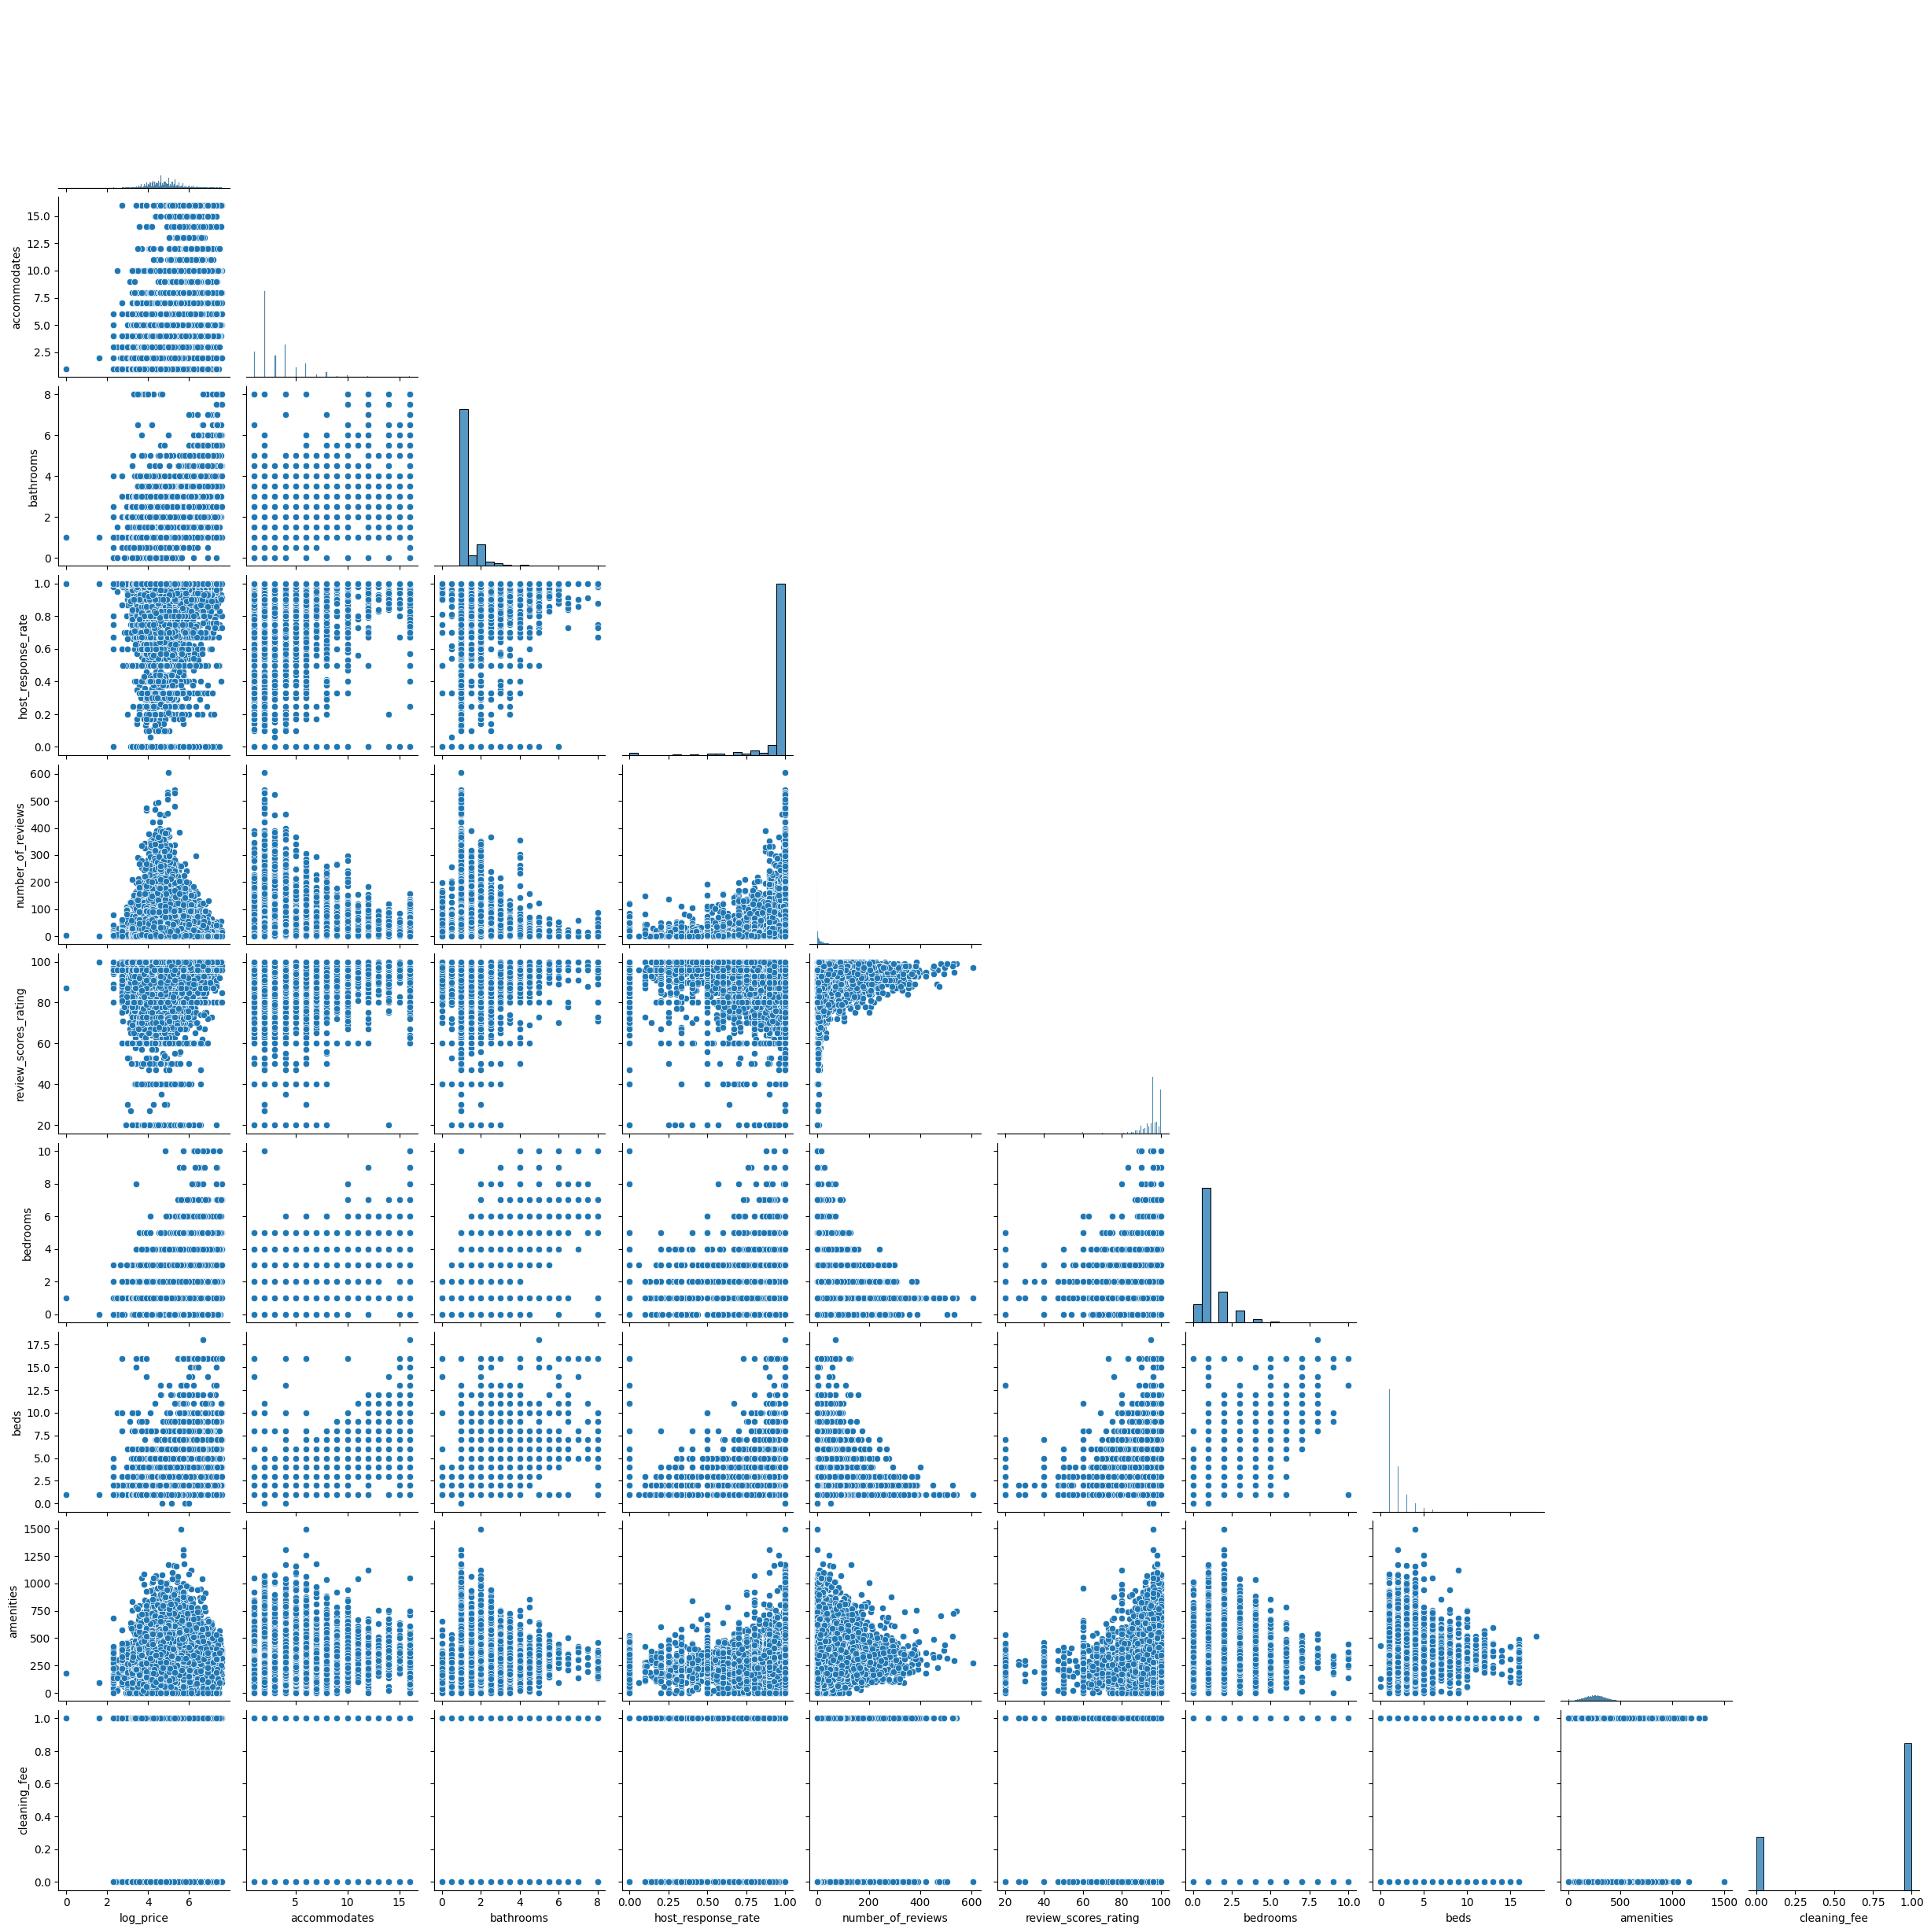

heatmap


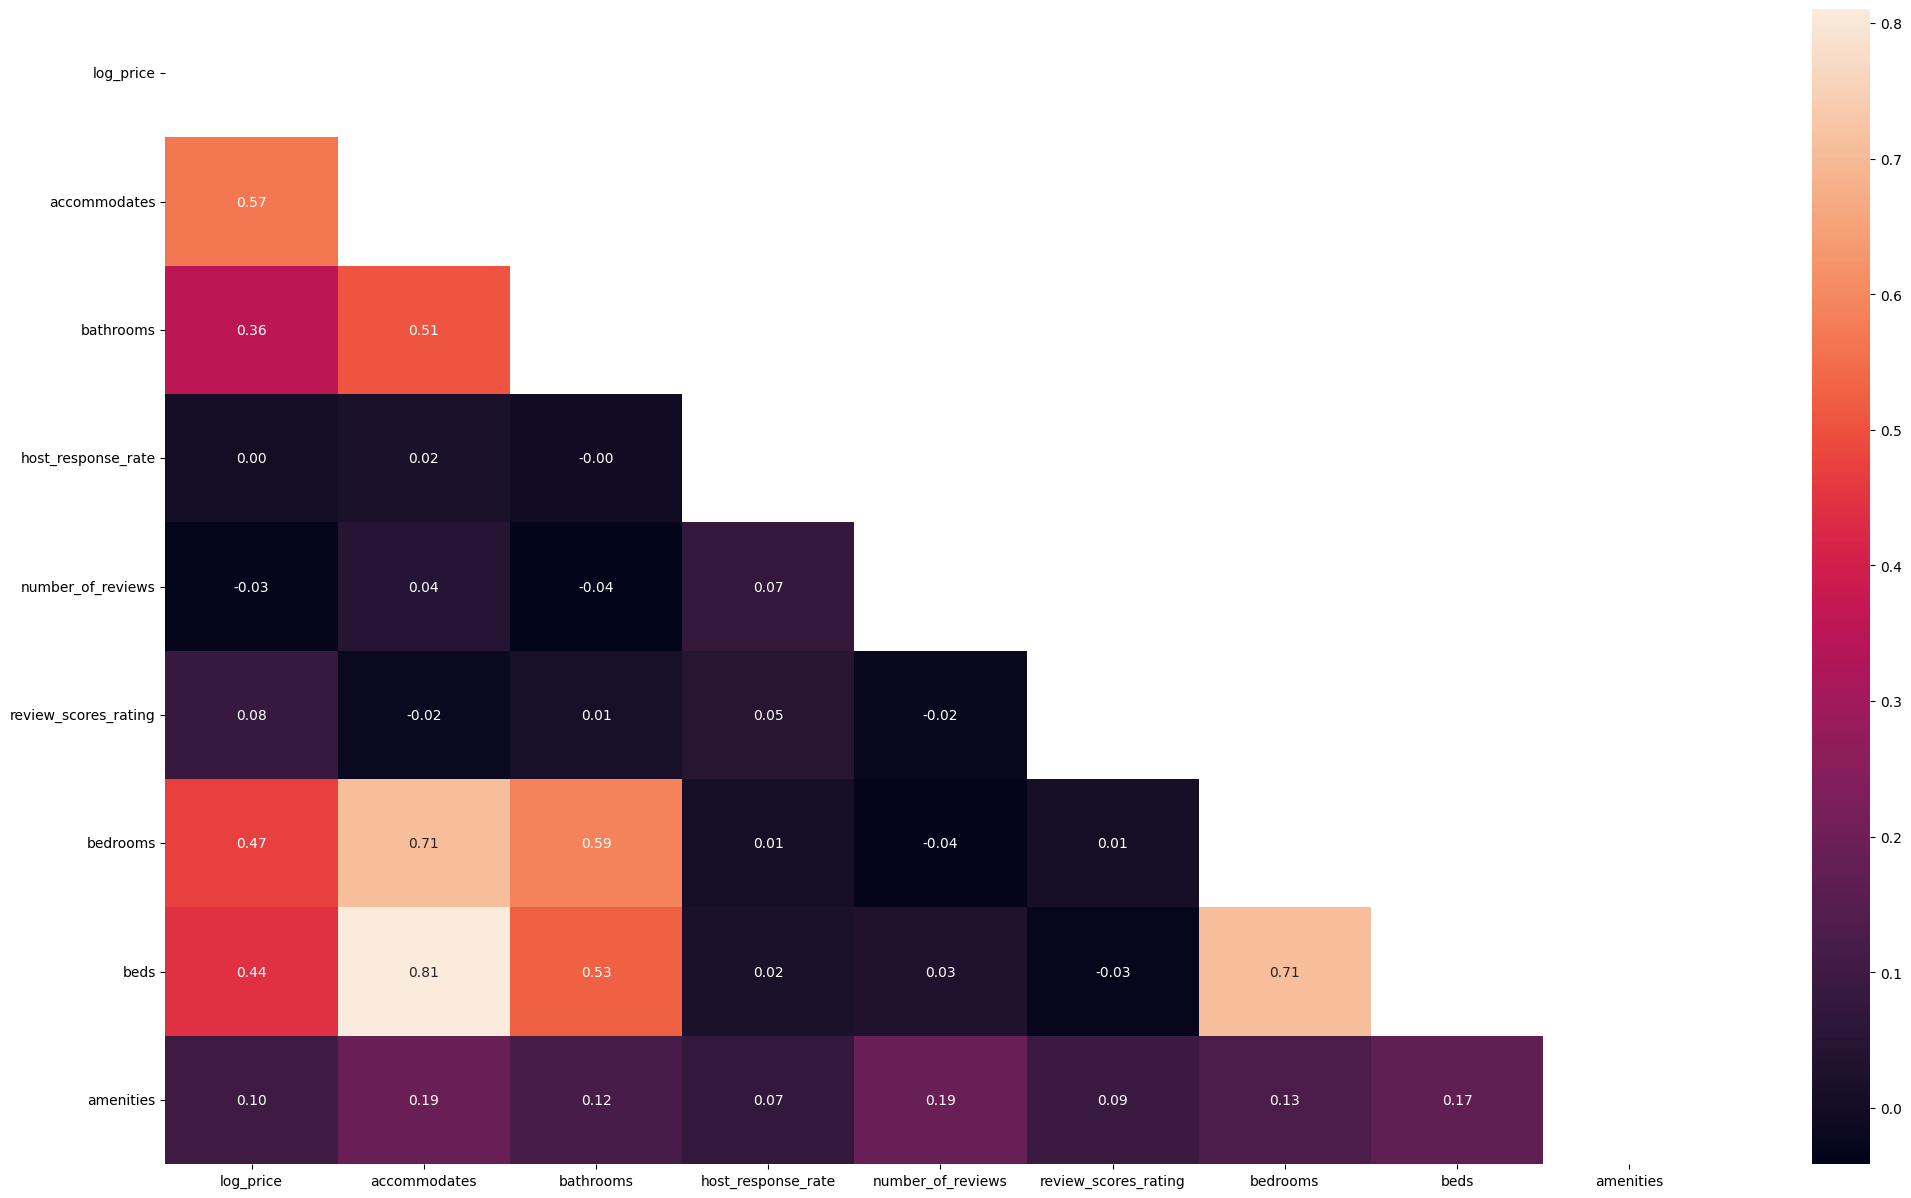

In [25]:
df_num = airbnb_v2.select_dtypes(include = 'number')
bivariate_num_num(airbnb_v2, df_num)

#### Key observations
Some pairs of attributes exhibit significant correlation.

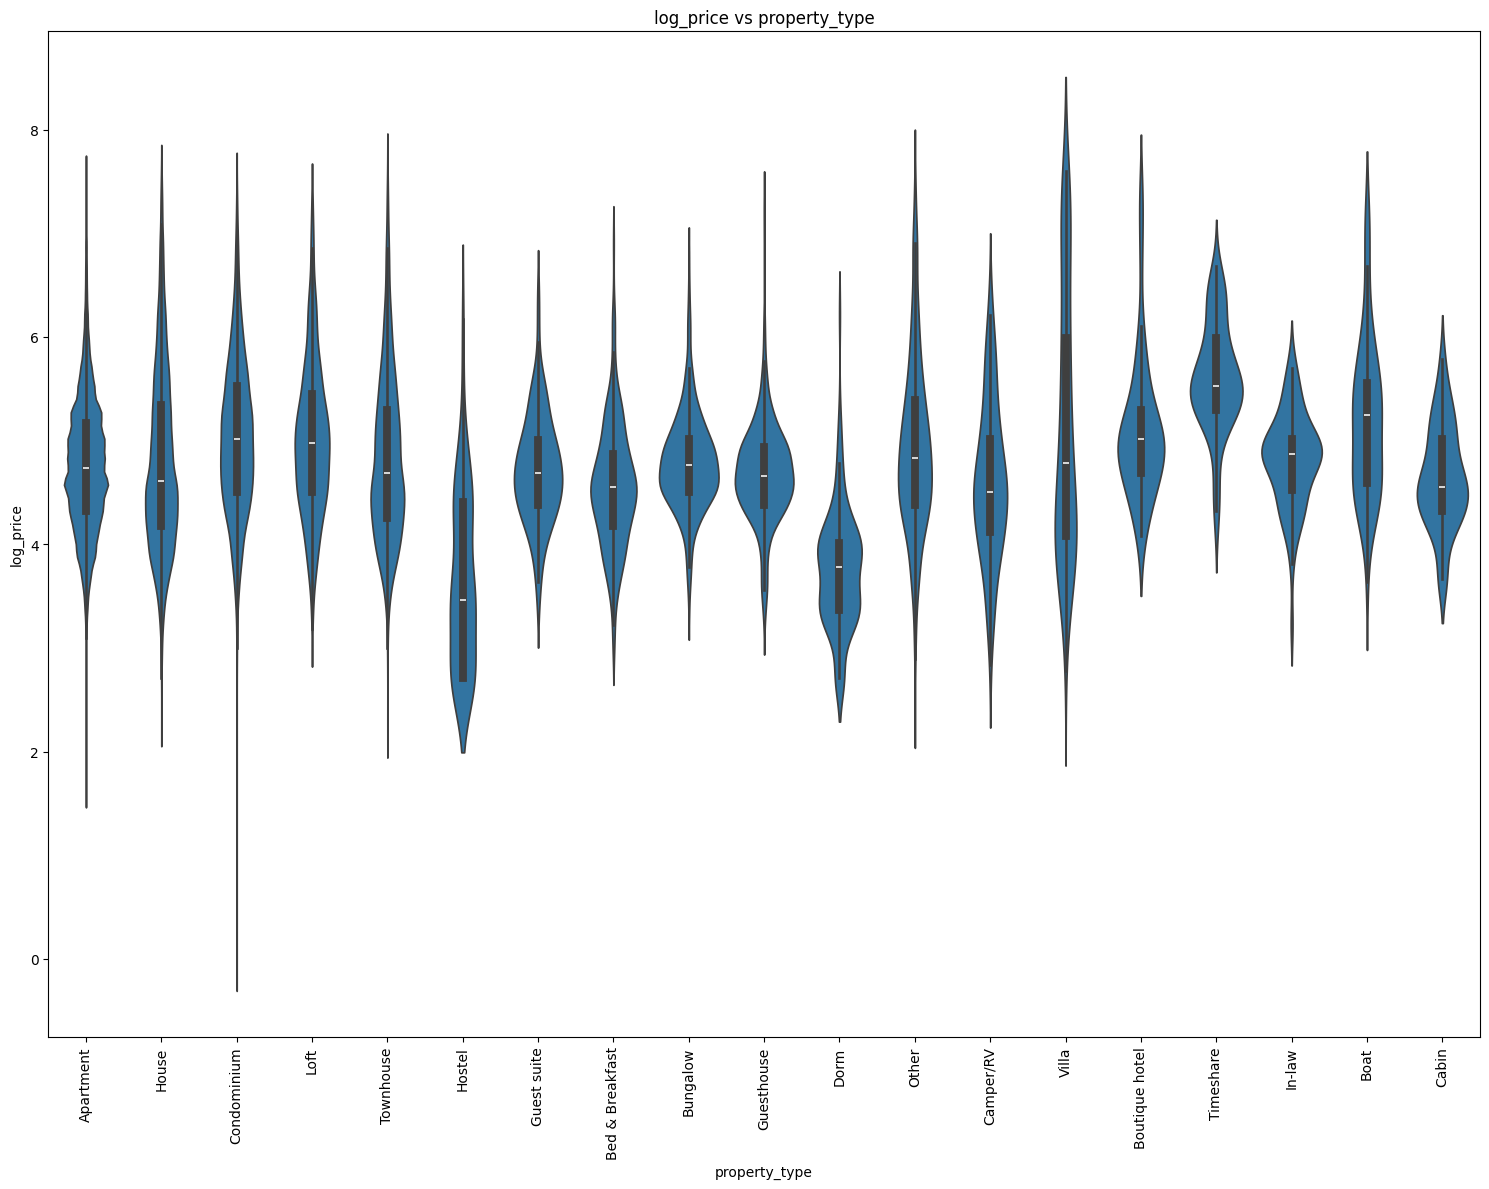

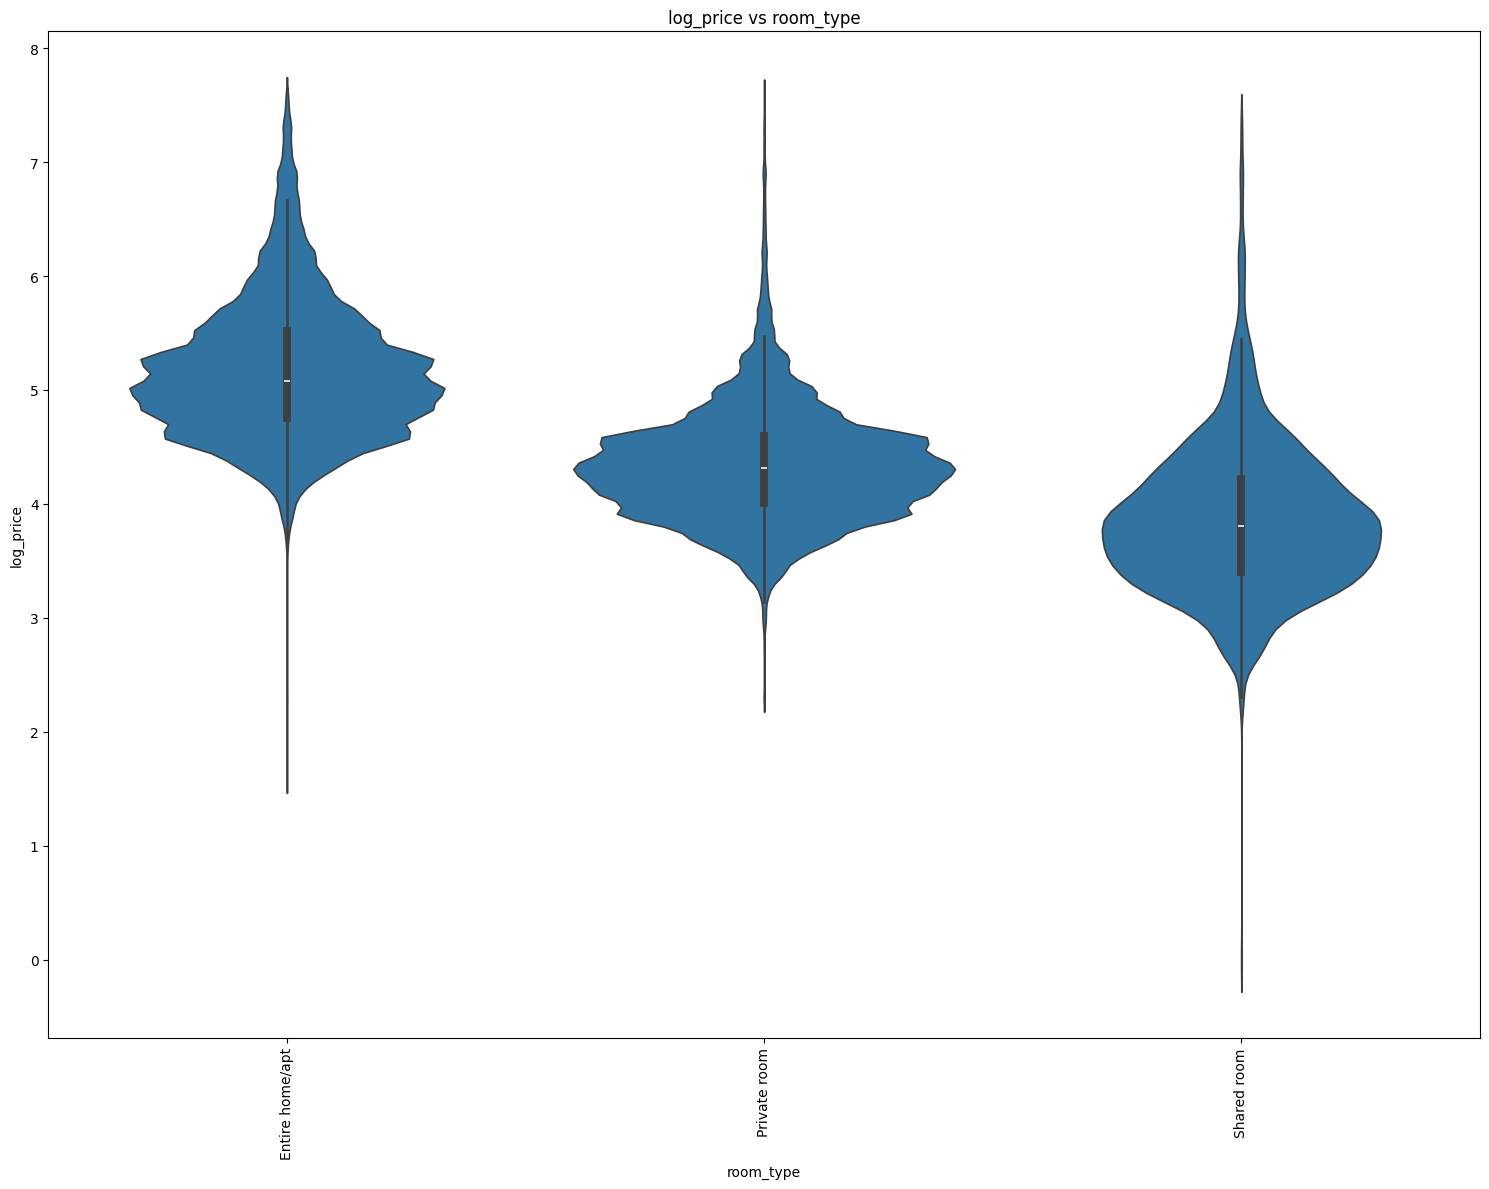

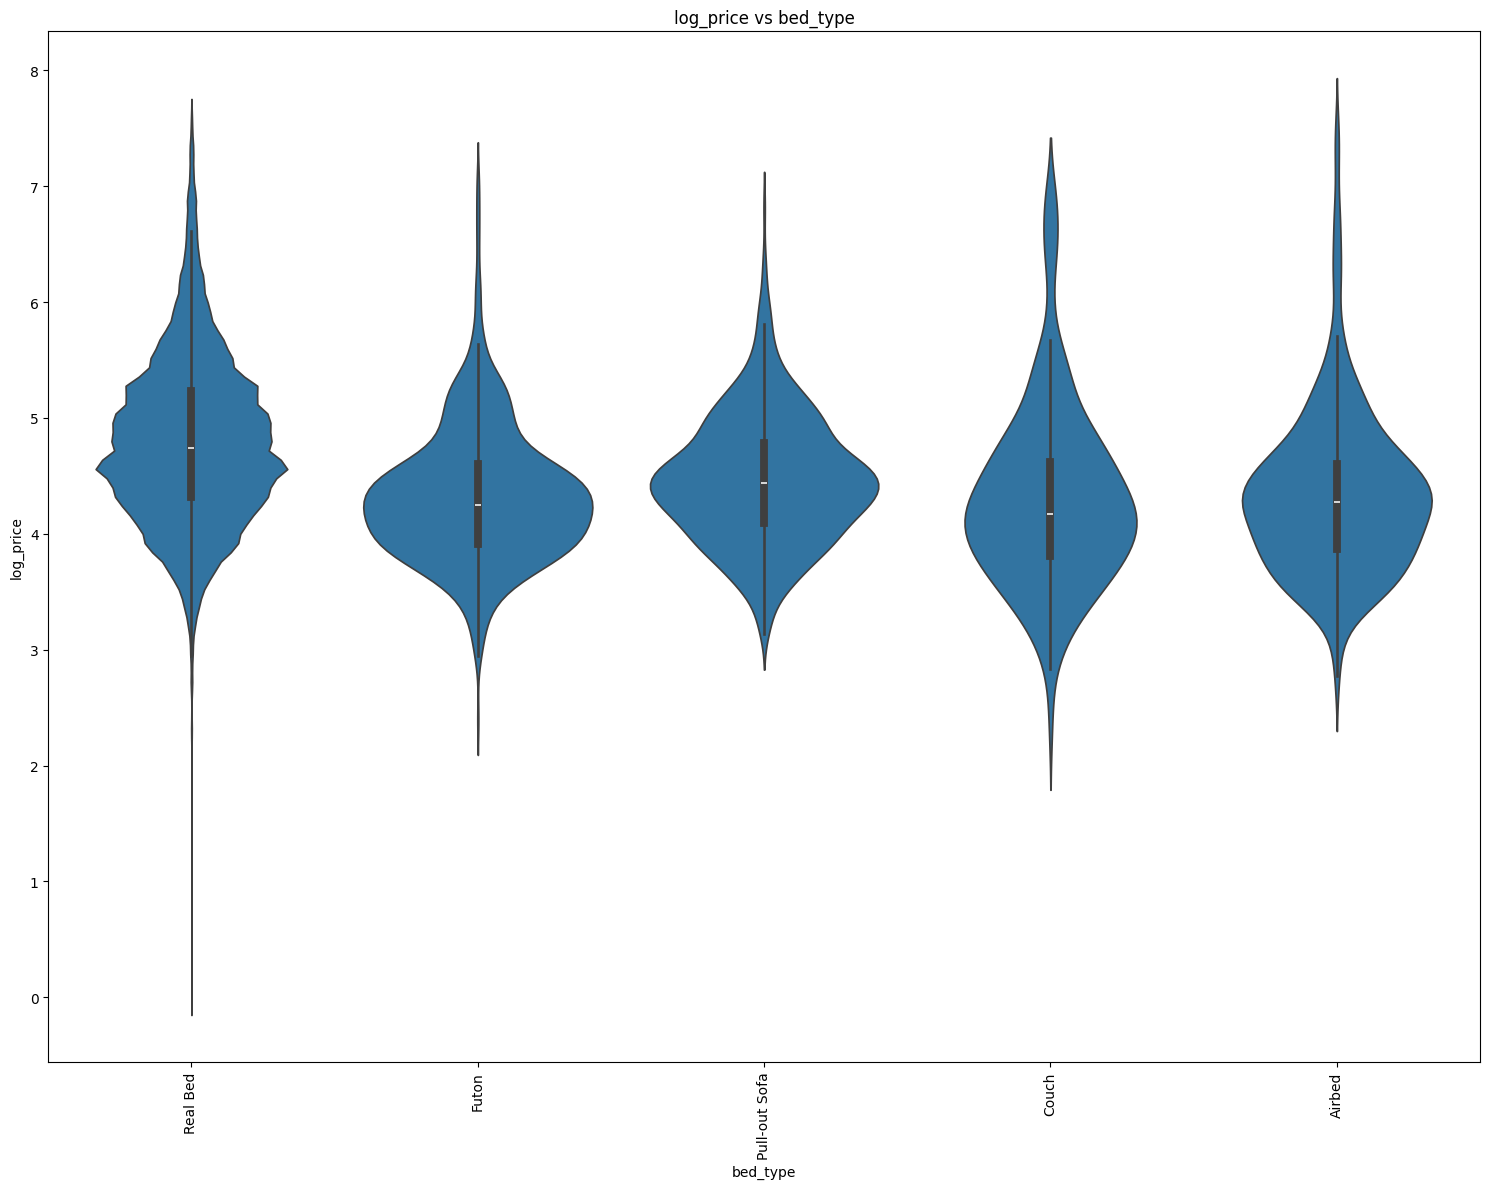

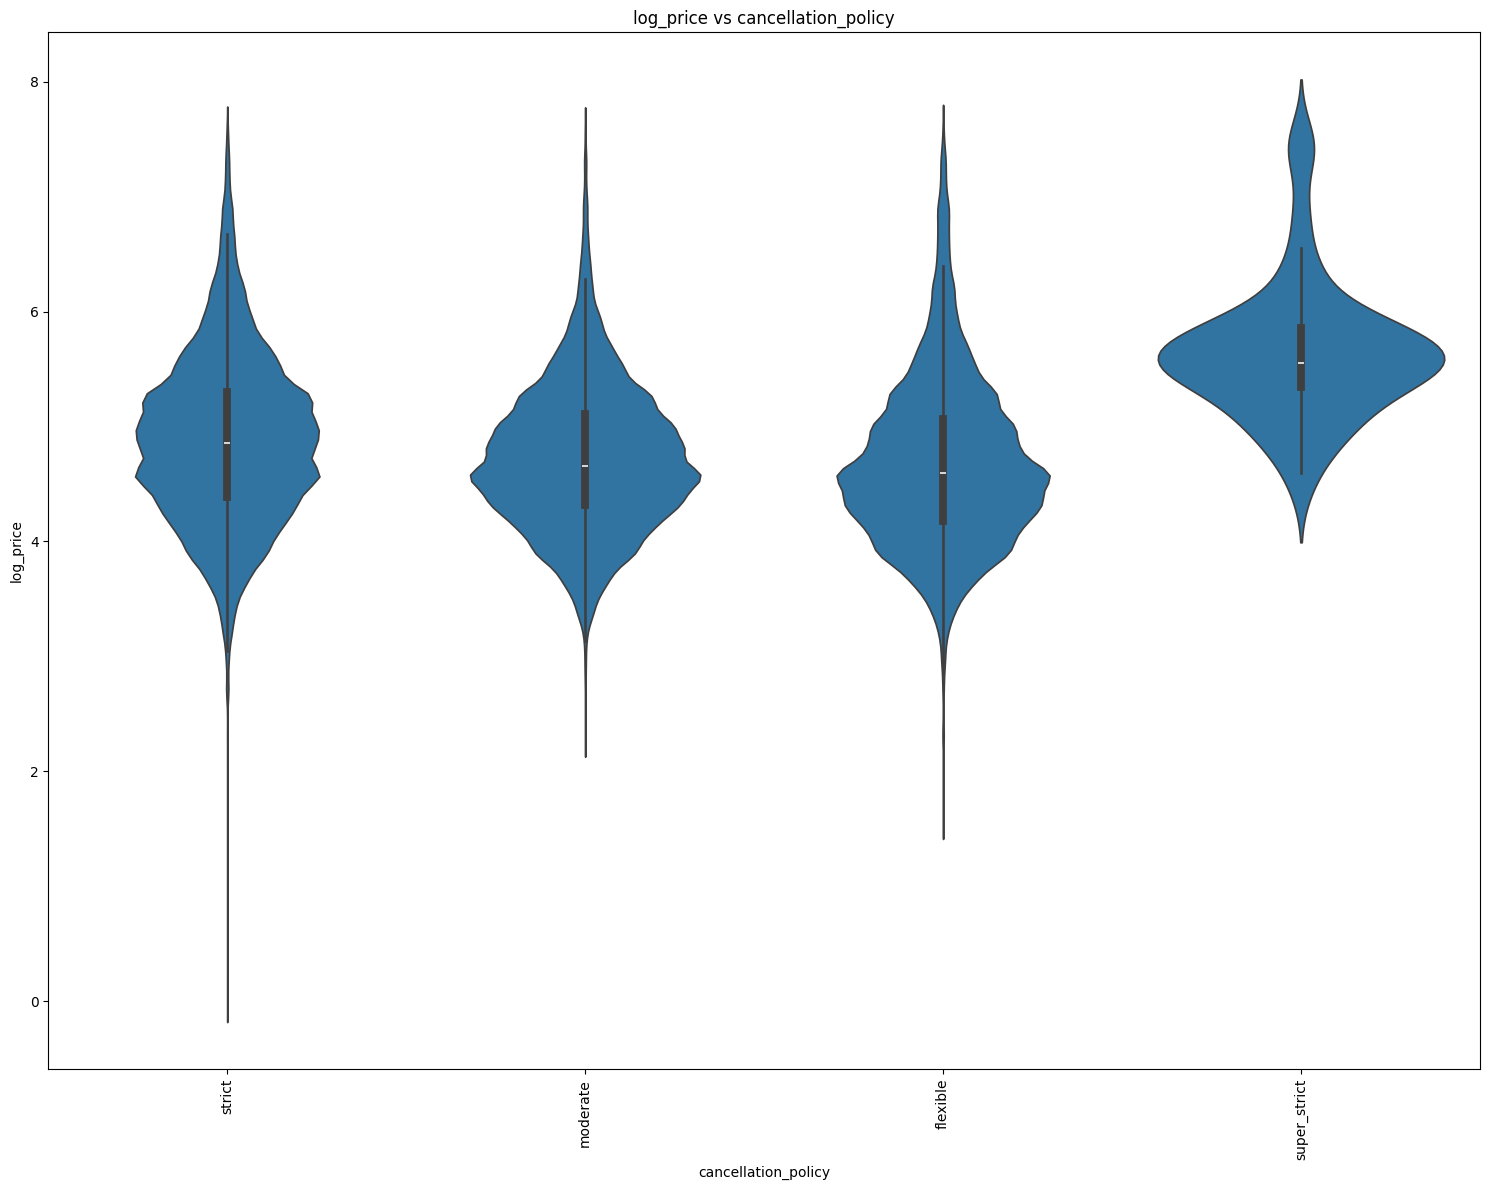

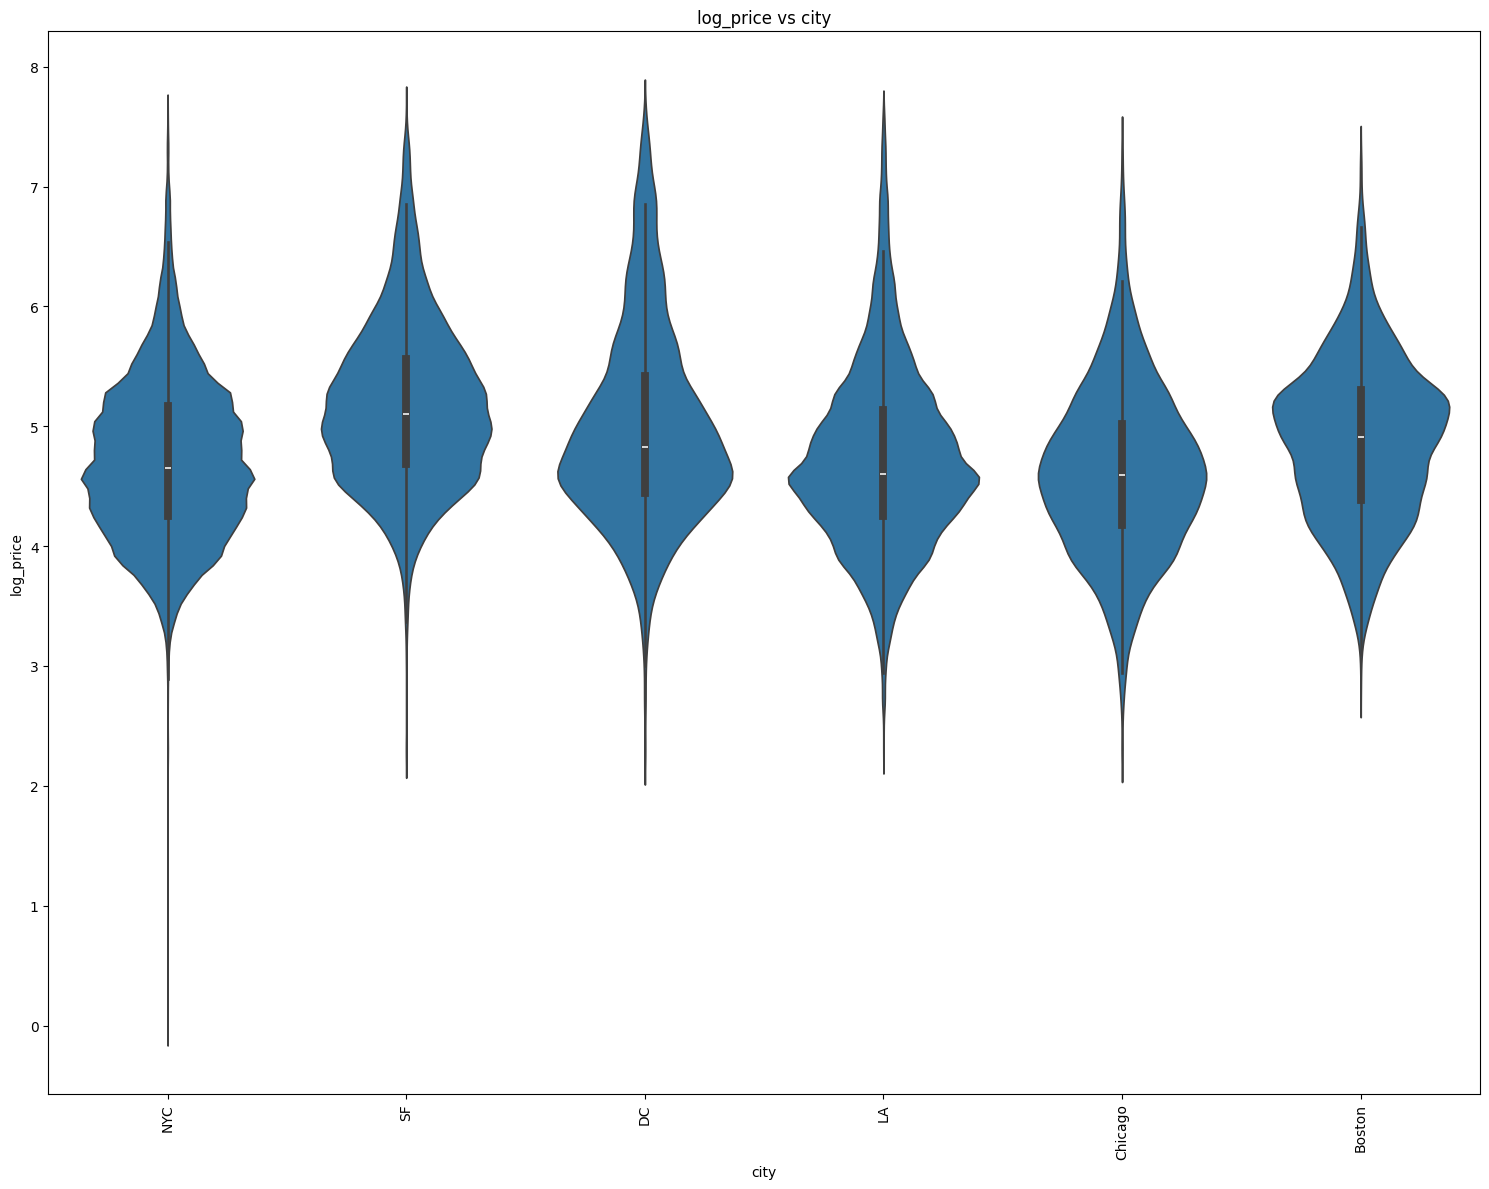

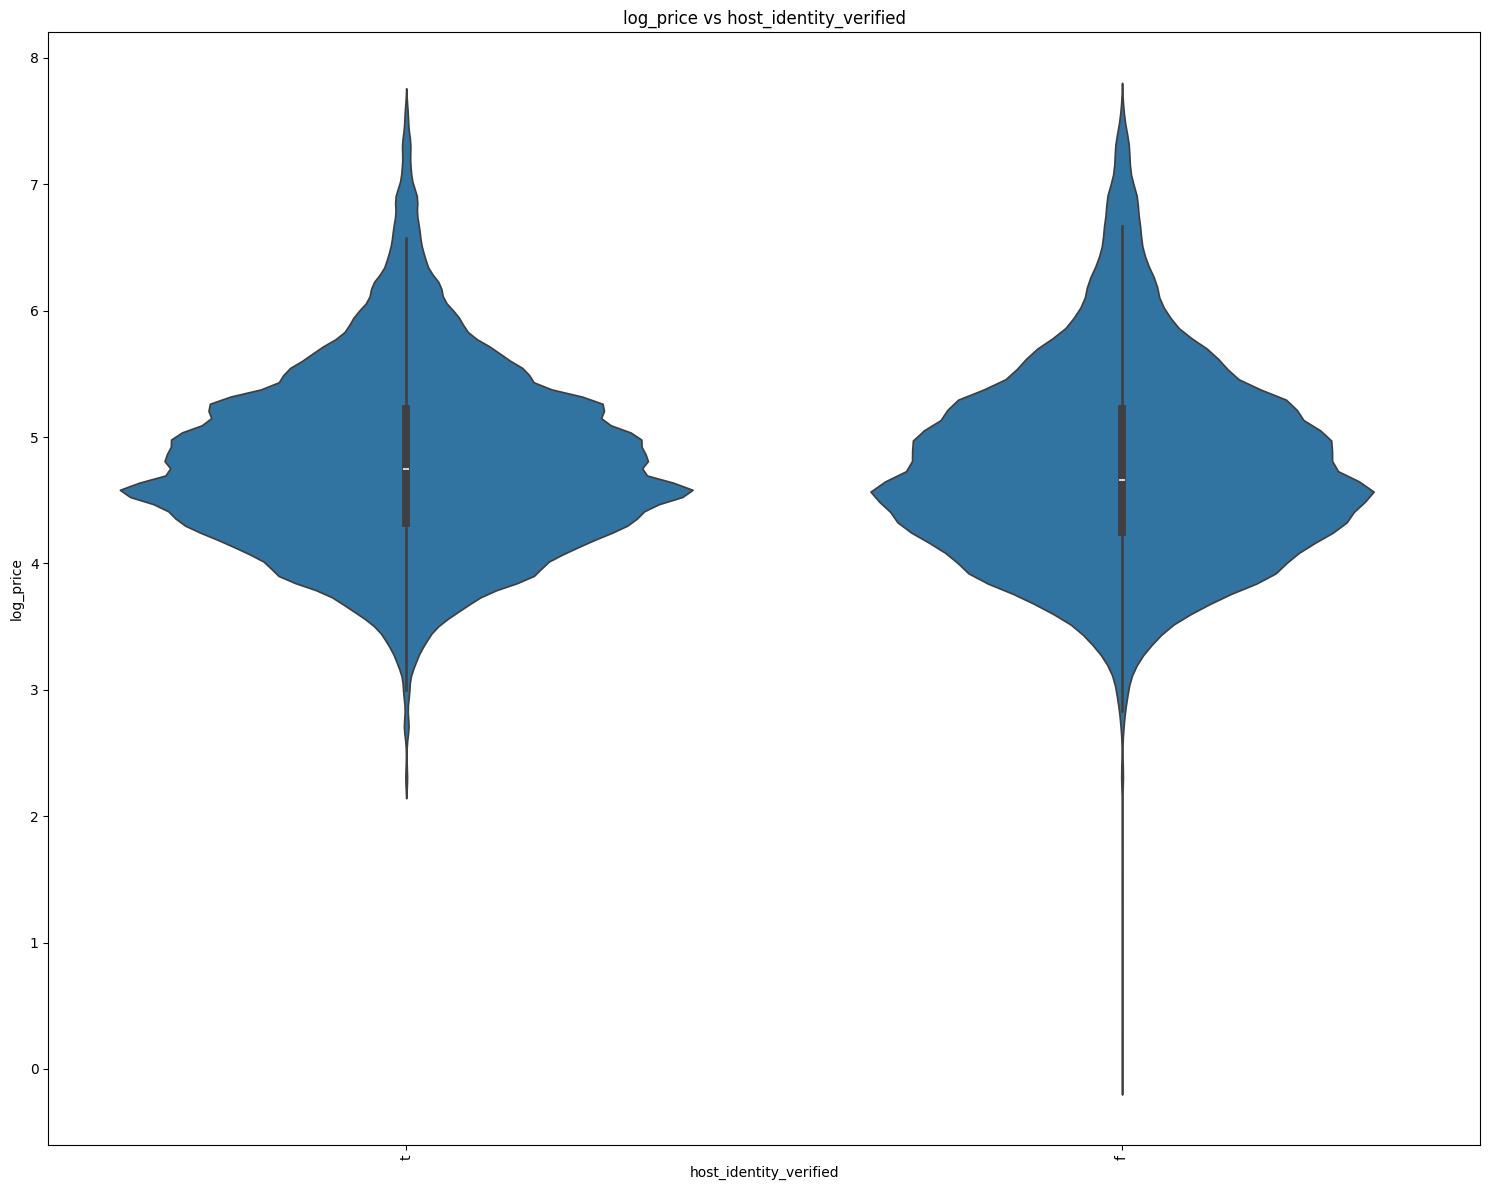

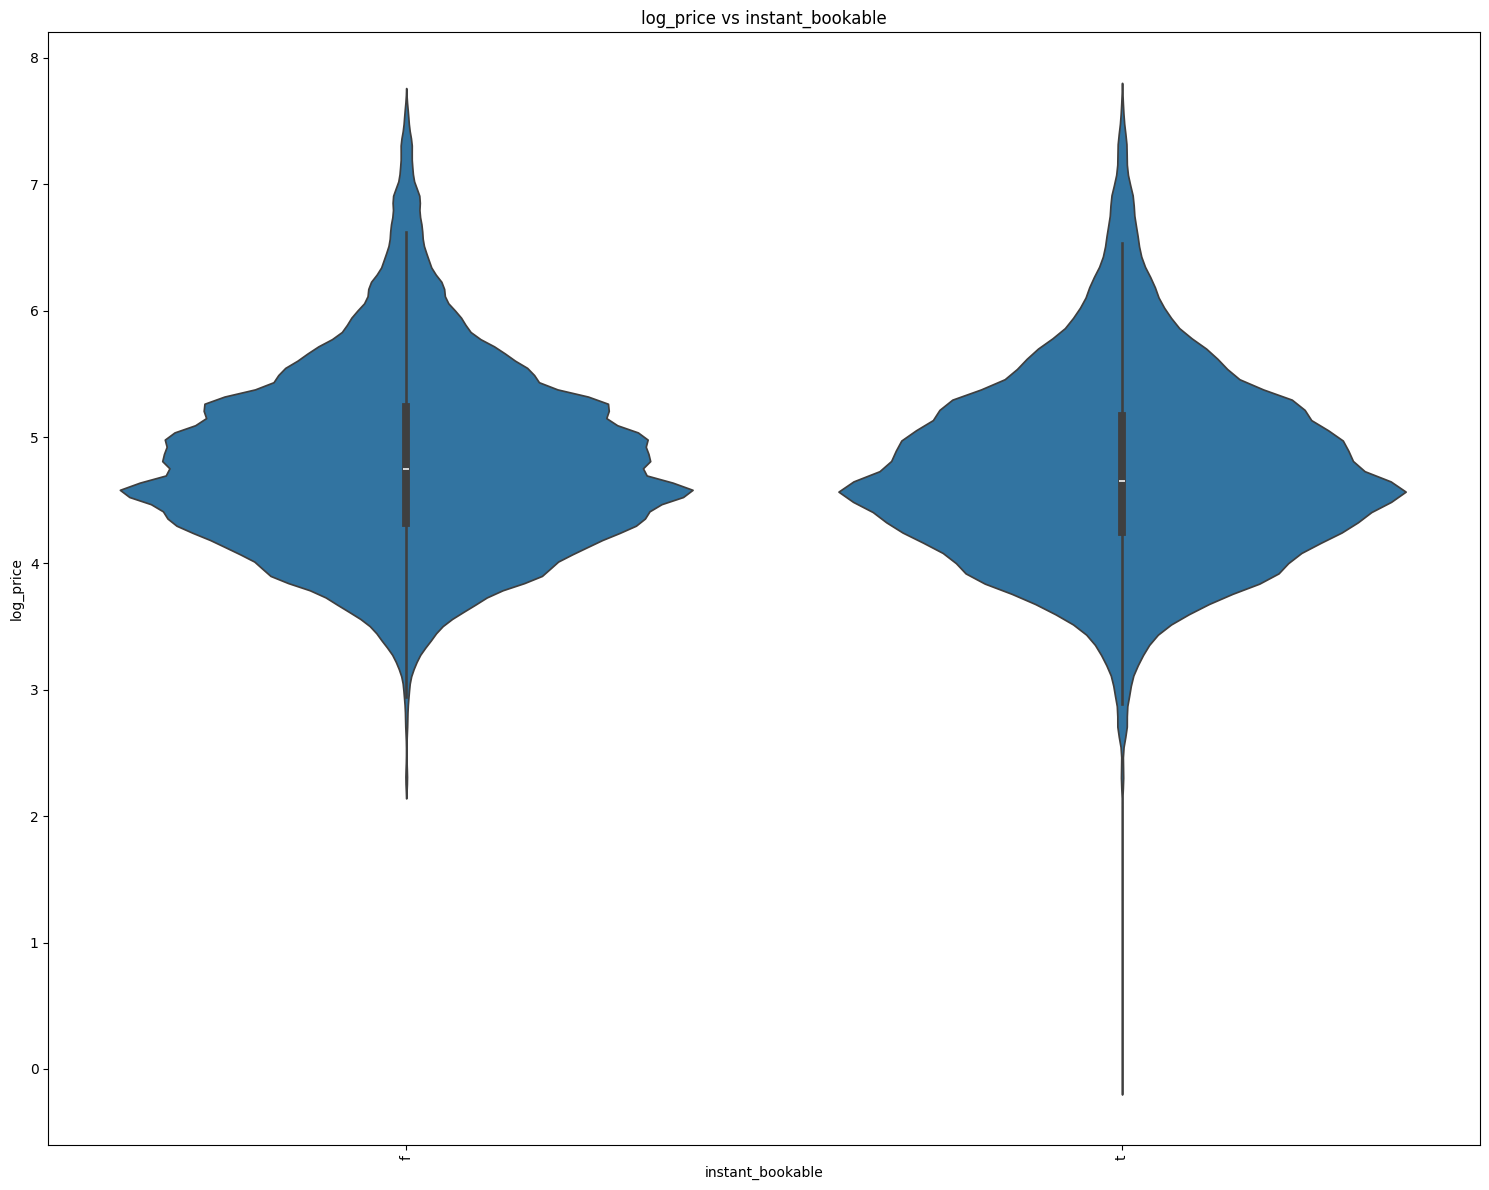

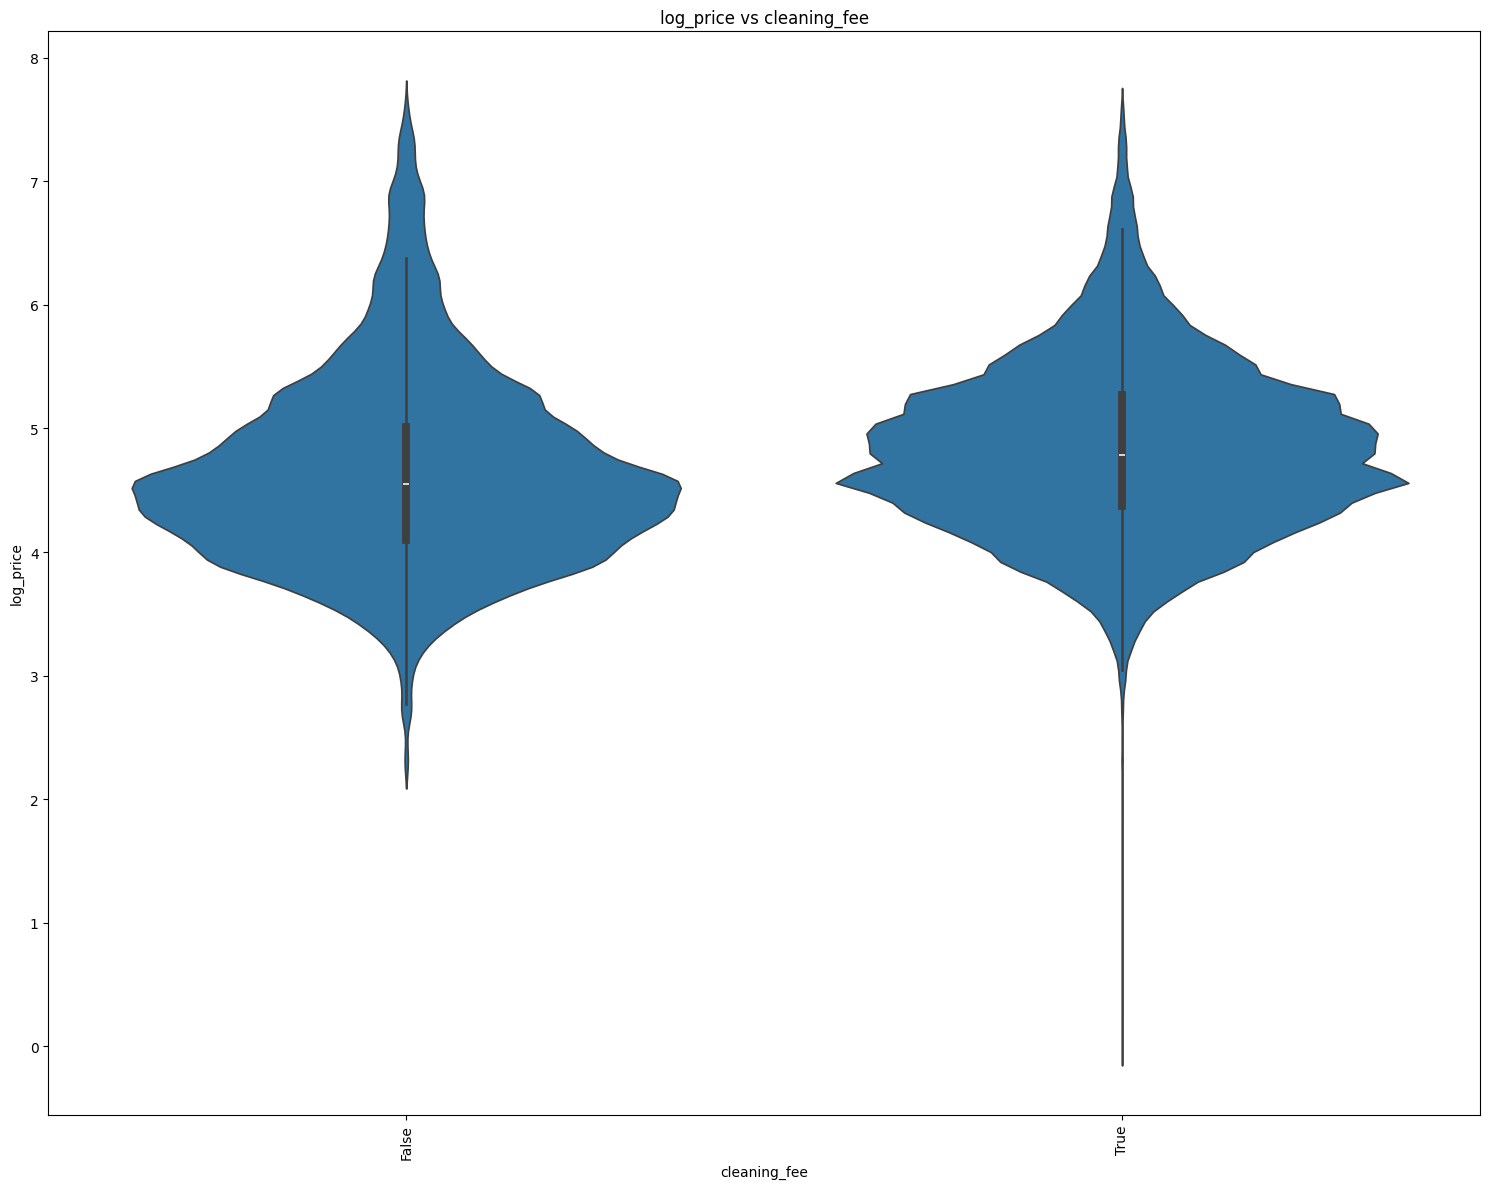

In [26]:
for col in airbnb_v2.select_dtypes(include = ['object', 'bool']).columns:
    plt.figure(figsize=(15, 12))

    # Plot violin plots for each numeric column
    sns.violinplot(x=col, y='log_price', data=airbnb_v2)
    plt.title(f'log_price vs {col}')
    plt.xticks(rotation=90)  # Rotate x-axis tick labels

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### Key observations
1. Timeshare have highest median price while hostel have lowest in all property_type, in which based on room types Entire home/apt have highest median log price and shared rooms have the lowest. And properties with real bed have higher median log price while those with Futon and Couch have lowest.
2. Interestingly, properties with super_strict cancellation policy have log priced significantly higher than others, this migh be due to high demand for these properties.
3. City wise, San-Francisco has the highest median log price while New York, Los Angeles and Chicago have lowest.
# Data Encoding

In [27]:
# creating a copy of df before encoding
airbnb_v3 = airbnb_v2.copy()

In [28]:
# creating dummy variables without droping first column for selected features
airbnb_v3 = pd.get_dummies(airbnb_v3, columns = ['property_type', 'room_type', 'cancellation_policy'], dtype = int)

In [29]:
# droping column with lowest value count for above features
airbnb_v3.drop(['property_type_Boat', 'room_type_Shared room', 'cancellation_policy_super_strict'], axis = 1, inplace = True)

In [30]:
# encoding for all other features
airbnb_v3 = pd.get_dummies(airbnb_v3, drop_first = True, dtype = int)
airbnb_v3.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,amenities,cleaning_fee,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_identity_verified_t,instant_bookable_t
0,5.010635,3.0,1.0,1.0,2.0,100.0,1.0,1.0,152,True,...,0,0,1,0,0,0,1,0,1,0
1,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0,218,True,...,0,0,1,0,0,0,1,0,0,1
2,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0,311,True,...,0,0,1,0,0,0,1,0,1,1
3,6.620073,4.0,1.0,1.0,0.0,96.0,2.0,2.0,210,True,...,0,0,1,0,0,0,0,1,1,0
4,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0,174,True,...,0,0,1,0,1,0,0,0,1,1


In [31]:
airbnb_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   log_price                      74111 non-null  float64
 1   accommodates                   74111 non-null  float64
 2   bathrooms                      74111 non-null  float64
 3   host_response_rate             74111 non-null  float64
 4   number_of_reviews              74111 non-null  float64
 5   review_scores_rating           74111 non-null  float64
 6   bedrooms                       74111 non-null  float64
 7   beds                           74111 non-null  float64
 8   amenities                      74111 non-null  int64  
 9   cleaning_fee                   74111 non-null  bool   
 10  property_type_Apartment        74111 non-null  int64  
 11  property_type_Bed & Breakfast  74111 non-null  int64  
 12  property_type_Boutique hotel   74111 non-null 

In [32]:
airbnb_v3['cleaning_fee'] = airbnb_v3['cleaning_fee'].astype('int')

# Linear regression


In [33]:
x=airbnb_v3.drop('log_price',axis=1)
y=airbnb_v3['log_price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [35]:
"""from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import r2_score
model = CatBoostRegressor(silent=True)
model.fit(x_train_poly, y_train)
y_pred_rf = model.predict(x_test_poly)
# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Catboost R-squared: {r2_rf:.4f}")"""

'from catboost import CatBoostRegressor\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\nfrom sklearn.metrics import r2_score\nmodel = CatBoostRegressor(silent=True)\nmodel.fit(x_train_poly, y_train)\ny_pred_rf = model.predict(x_test_poly)\n# Calculate R-squared\nr2_rf = r2_score(y_test, y_pred_rf)\nprint(f"Catboost R-squared: {r2_rf:.4f}")'

In [36]:
"""y_train_pred = model.predict(x_train_poly)
training_accuracy = r2_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")"""

'y_train_pred = model.predict(x_train_poly)\ntraining_accuracy = r2_score(y_train, y_train_pred)\nprint(f"Training Accuracy: {training_accuracy:.4f}")'

# **BLENDING**

In [37]:
"""from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

cat_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, silent=True)
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1)
rf_model = RandomForestRegressor(n_estimators=100)

cat_model.fit(x_train_poly, y_train)
lgbm_model.fit(x_train_poly, y_train)
rf_model.fit(x_train_poly, y_train)

y_pred_cat = cat_model.predict(x_test_poly)
y_pred_lgbm = lgbm_model.predict(x_test_poly)
y_pred_rf = rf_model.predict(x_test_poly)
"""



'from catboost import CatBoostRegressor\nfrom lightgbm import LGBMRegressor\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import r2_score\n\ncat_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, silent=True)\nlgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1)\nrf_model = RandomForestRegressor(n_estimators=100)\n\ncat_model.fit(x_train_poly, y_train)\nlgbm_model.fit(x_train_poly, y_train)\nrf_model.fit(x_train_poly, y_train)\n\ny_pred_cat = cat_model.predict(x_test_poly)\ny_pred_lgbm = lgbm_model.predict(x_test_poly)\ny_pred_rf = rf_model.predict(x_test_poly)\n'

In [38]:
"""from itertools import product
weight_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

best_r2 = -np.inf
best_weights = None

for w1, w2, w3 in product(weight_values, repeat=3):
    if round(w1 + w2 + w3, 1) == 1.0:  # Ensure weights sum to 1
        y_pred_blend = (w1 * y_pred_cat) + (w2 * y_pred_lgbm) + (w3 * y_pred_rf)
        r2_blend = r2_score(y_test, y_pred_blend)

        if r2_blend > best_r2:
            best_r2 = r2_blend
            best_weights = (w1, w2, w3)

print(f"Best Weights: CatBoost={best_weights[0]}, LightGBM={best_weights[1]}, RF={best_weights[2]}")
print(f"Best Blended Model R² Score: {best_r2:.4f}")"""

'from itertools import product\nweight_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]\n\nbest_r2 = -np.inf\nbest_weights = None\n\nfor w1, w2, w3 in product(weight_values, repeat=3):\n    if round(w1 + w2 + w3, 1) == 1.0:  # Ensure weights sum to 1\n        y_pred_blend = (w1 * y_pred_cat) + (w2 * y_pred_lgbm) + (w3 * y_pred_rf)\n        r2_blend = r2_score(y_test, y_pred_blend)\n\n        if r2_blend > best_r2:\n            best_r2 = r2_blend\n            best_weights = (w1, w2, w3)\n\nprint(f"Best Weights: CatBoost={best_weights[0]}, LightGBM={best_weights[1]}, RF={best_weights[2]}")\nprint(f"Best Blended Model R² Score: {best_r2:.4f}")'

In [39]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.6 MB/s eta 0:00:00


In [40]:
pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 3.7 MB/s eta 0:00:00


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

cat_model = CatBoostRegressor(n_estimators=100, silent=True)
lgbm_model = LGBMRegressor(n_estimators=100)
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05)

cat_model.fit(x_train_poly, y_train)
lgbm_model.fit(x_train_poly, y_train)
gbr_model.fit(x_train_poly, y_train)


y_pred_cat = cat_model.predict(x_test_poly)
y_pred_lgbm = lgbm_model.predict(x_test_poly)
y_pred_gbr =gbr_model.predict(x_test_poly)

stacked_predictions = np.column_stack((y_pred_cat, y_pred_lgbm,y_pred_gbr))

meta_model = XGBRegressor()
meta_model.fit(stacked_predictions, y_test)

y_pred_stack = meta_model.predict(stacked_predictions)

r2_stack = r2_score(y_test, y_pred_stack)
print(f"Stacking Model R² Score: {r2_stack:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20820
[LightGBM] [Info] Number of data points in the train set: 59288, number of used features: 660
[LightGBM] [Info] Start training from score 4.780538
Stacking Model R² Score: 0.7325


In [42]:
import joblib


joblib.dump(meta_model, '/content/drive/MyDrive/model.joblib')


['/content/drive/MyDrive/model.joblib']

In [43]:
model = joblib.load('/content/drive/MyDrive/model.joblib')

In [44]:
"""import pickle

with open('num_imputer.pkl', 'rb') as file:
    loaded_num_imputer = pickle.load(file)

with open('obj_imputer.pkl', 'rb') as file:
    loaded_obj_imputer = pickle.load(file)"""

"import pickle\n\nwith open('num_imputer.pkl', 'rb') as file:\n    loaded_num_imputer = pickle.load(file)\n\nwith open('obj_imputer.pkl', 'rb') as file:\n    loaded_obj_imputer = pickle.load(file)"

In [45]:
print(x_train.shape[1])
print(x_train_poly.shape[1])

43
947


In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x,y)

feature_importances = pd.DataFrame({
    "Feature": x.columns,
    "Importance": rfr.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(feature_importances.head(30))

                          Feature  Importance
27      room_type_Entire home/apt    0.364274
7                       amenities    0.135271
1                       bathrooms    0.127491
3               number_of_reviews    0.062716
0                    accommodates    0.038823
4            review_scores_rating    0.031143
5                        bedrooms    0.029260
2              host_response_rate    0.020854
40                        city_SF    0.017719
6                            beds    0.017137
38                        city_LA    0.015228
41       host_identity_verified_t    0.014006
8                    cleaning_fee    0.013943
42             instant_bookable_t    0.012224
28         room_type_Private room    0.011034
37                        city_DC    0.009827
20            property_type_House    0.009273
31     cancellation_policy_strict    0.009016
29   cancellation_policy_flexible    0.008296
36                   city_Chicago    0.007794
39                       city_NYC 

In [47]:
selected_features = [
    "room_type_Entire home/apt", "amenities", "bathrooms", "number_of_reviews",
    "accommodates", "review_scores_rating", "bedrooms", "host_response_rate",
    "city_SF", "beds", "city_LA", "host_identity_verified_t", "cleaning_fee",
    "instant_bookable_t", "room_type_Private room", "city_DC",
    "property_type_House", "cancellation_policy_strict",
    "cancellation_policy_flexible", "city_Chicago", "city_NYC",
    "cancellation_policy_moderate", "property_type_Apartment",
    "property_type_Condominium", "property_type_Loft",
    "bed_type_Real Bed", "property_type_Townhouse",
    "property_type_Other", "property_type_Bed & Breakfast",
    "bed_type_Futon"
]

X = airbnb_v3[selected_features]
y = airbnb_v3["log_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

cat_model = CatBoostRegressor(n_estimators=100, silent=True)
lgbm_model = LGBMRegressor(n_estimators=100)
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05)

cat_model.fit(X_train, Y_train)
lgbm_model.fit(X_train, Y_train)
gbr_model.fit(X_train, Y_train)


y_pred_cat = cat_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_gbr =gbr_model.predict(X_test)

stacked_predictions = np.column_stack((y_pred_cat, y_pred_lgbm,y_pred_gbr))

meta_model = XGBRegressor()
meta_model.fit(stacked_predictions, Y_test)

y_pred_stack = meta_model.predict(stacked_predictions)

r2_stack = r2_score(y_test, y_pred_stack)
print(f"Stacking Model R² Score: {r2_stack:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 59288, number of used features: 30
[LightGBM] [Info] Start training from score 4.780538
Stacking Model R² Score: 0.7308


In [50]:
import joblib

joblib.dump(meta_model, '/content/drive/MyDrive/model1.joblib')

['/content/drive/MyDrive/model1.joblib']

In [51]:
allowed_values = {feature: airbnb_v3[feature].dropna().unique().tolist() for feature in selected_features}

allowed_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in allowed_values.items()]))
allowed_values_df.to_csv("/content/drive/MyDrive/allowed_values.csv", index=False)

print("Allowed values saved to allowed_values.csv")

Allowed values saved to allowed_values.csv


In [53]:
joblib.dump(cat_model, "/content/drive/MyDrive/catboost_model.joblib")
joblib.dump(lgbm_model, "/content/drive/MyDrive/lgbm_model.joblib")
joblib.dump(gbr_model, "/content/drive/MyDrive/gbr_model.joblib")
joblib.dump(meta_model, "/content/drive/MyDrive/model1.joblib")

['/content/drive/MyDrive/model1.joblib']